# Objective

# Experiment 1

Followed the procedure:
 
 - For each verse in each target language, found difference with number of words in source(hindi) 
 - Filtered verses having *words count difference* > 15
 - Found **levenshtein ratio** and **cosine similarity** between each target verse and sourse verse
 - Verses having edit ratio < 0.35 and cosine similarity score< 0.1 are considered as wrong alignments. Flagged them as wrong alignment in each target file.
 - Threshold values are selected after analysing verses in few books





## Code

In [7]:
import os
import gc
import re
import string
import traceback
import Levenshtein
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
''' Cleaning a string '''

def clean_text(text):
    text = re.sub('[“”]', '"', text)
    text = re.sub('[‘’]', "'", text)
    text = re.sub('।', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('\s\s+', ' ', text)
    return text.strip()

In [9]:
''' Finds cosine similarity between to strings '''

def find_cosine_similarity(string1, string2):
    try:
        string1 = clean_text(string1)
        string2 = clean_text(string2)
        vectorizer = CountVectorizer().fit_transform([string1, string2])
        vectors = vectorizer.toarray()
        vec1 = vectors[0].reshape(1, -1)
        vec2 = vectors[1].reshape(1, -1)
        return cosine_similarity(vec1, vec2)[0][0]
    except Exception as e:
        print(e)  
        traceback.print_exc()

In [16]:
print("\n..................... Post checking the alignments ......................\n")
cwd = os.getcwd()
corpora_path = '/'.join(cwd.split('/')[:-2]) + '/corpora/'
for book in sorted(os.listdir(corpora_path)):
    print("\n************************ Book : ",book, '****************************\n')
    for min_lang in os.listdir(corpora_path + book):
        print("\n\nmin_lang :: ",min_lang + '\n\n')
        lang_name = min_lang.split('_')[0]
        source_file = book + '_hindi.txt'
        target_file = book + '_' + lang_name + '.txt'
        source_lines = open(corpora_path + book + '/' + min_lang + '/' + source_file, 'r').readlines()
        target_lines = open(corpora_path + book + '/' + min_lang + '/' + target_file, 'r').readlines()
        post_file = book + '_' + lang_name + '_checked.txt'
        if len(source_lines) != len(target_lines):
            # print("Mismatch in number of lines.........")
            break
        data = ''   
        for index,s_line in enumerate(source_lines):
            s_line = s_line.split('\t')[-1]
            t_line = (target_lines[index]).split('\t')[-1]
            
            '''calculates difference in number of words'''
            words_diff  = abs(len(s_line.split()) - len(t_line.split()))
            
            if words_diff > 15:
                ''' filtered verses having high difference by seting threshold 15. 
                    calculates edit ratio and cosine similarity score '''
                edit_ratio = round(Levenshtein.ratio(s_line,t_line), 2)
                cosine_score = round(find_cosine_similarity(s_line,t_line), 2)

                if cosine_score < 0.1 and edit_ratio < 0.35:
                    ''' Filtered wrong alignments by seting threshold values for cosine score
                        and edit ratio '''
                    print(words_diff, '\t',edit_ratio, '\t', cosine_score, '\t', source_lines[index].strip(), '\t', target_lines[index].strip(), '\t','WRONG ALIGNMENT\n')
                    data += (target_lines[index]).strip() + '\t' + 'WRONG ALIGNMENT' + '\n'
                else:
                    print(words_diff, '\t',edit_ratio, '\t', cosine_score, '\t', source_lines[index].strip(), '\t', target_lines[index].strip(), '\t', 'CORRECT ALIGNMENT\n')
                    data += target_lines[index]     
            else:
                data += target_lines[index]        
        fp = open(corpora_path + book + '/' + min_lang + '/' + post_file, 'w')    
        fp.write(data)
        fp.close()


..................... Post checking the alignments ......................


************************ Book :  40_MAT ****************************



min_lang ::  Mandeali _MJLNT


20 	 0.49 	 0.29 	 2	1	हेरोदेस राजा के दिनों में जब यहूदिया के बैतलहम में यीशु का जन्‍म हुआ, तो देखो, पूर्व से कई ज्‍योतिषी यरूशलेम में आकर पूछने लगे। 	 2	1	हेरोदेस राजा जेबे यहूदिया ईलाके मन्झ राज करहा था तेबे तेस जिल्ले रे बैतलैहम गांऊँआं मन्झ यीसू रा जन्म हुआ। तिन्हा ध्याड़े मन्झ पूर्व देसा ले कई ज्ञानी लोक जेह्ड़े तारेया रे बारे जाणहां ऐें थे, स्यों यरुस्लेम सैहरा मन्झ आई किन्हें पुछदे लगे कि, 	 CORRECT ALIGNMENT

21 	 0.42 	 0.0 	 2	7	तब हेरोदेस ने ज्‍योतिषियों को चुपके से बुलाकर उनसे पूछा, कि तारा ठीक किस समय दिखाई दिया था। 	 2	7	हेरोदेस राजा जाणना चाहाँ था कि तेस बच्चे री उम्र कितनी ई, इधी कठे तिन्हें तिन्हा ज्ञानी लोक जेह्ड़े तारेया रे बारे जाणहां ऐें थे चुप चाप सादे होर तिन्हा ले पूछेया कि, तारा ठीक केस टैम सुझ्या था। 	 CORRECT ALIGNMENT

24 	 0.39 	 0.2 	 2	9-10	 वे राजा की बात सुनकर चले गए, और देखो, ज

18 	 0.29 	 0.0 	 24	28	”जहाँ लोथ हो, वहीं गिद्ध इकट्ठे होंगे। 	 24	28	जित्ते लाश हो, सारे लोक्कां जो ए इय्यां पता लगी जाणा कि ए कुते होणा जिय्यां कि इल्लणां रे कठीणे पर लाश रा पता चलदा। 	 WRONG ALIGNMENT

26 	 0.39 	 0.22 	 25	25	इसलिए मैं डर गया और जाकर तेरा तोड़ा मिट्टी में छिपा दिया; देख, ‘जो तेरा है, वह यह है।’ 	 25	25	इधेरे तांइ मै डरी गेया थिया किजोकी जे अगर मै तुसी रे तोड़े जो गवाई दिंदा तां तुसी मेरे जो सजा दैणी थी, इधेरे तांइ मै जाई करी तेरे तोड़े जो जमीन अदंर दब्बी दित्तेया ए लेयो जे तुसी रा है ए रेया, लेई लो। 	 CORRECT ALIGNMENT

16 	 0.3 	 0.0 	 25	46	”और यह अनन्‍त दण्‍ड भोगेंगे परन्‍तु धर्मी अनन्‍त जीवन में प्रवेश करेंगे।” 	 25	46	ते तिन्हा पुठ्ठे पास्से वाले बुरे लोक्कां ने हमेशा बलणे वाली अग्ग बिच सजा भुगतणी पर, धार्मिक सिद्दे पास्से वाले लोक्कां ने हमेशा री जिन्दगी बिच चली जाणा। 	 WRONG ALIGNMENT

16 	 0.51 	 0.14 	 27	64	अतः आज्ञा दे कि तीसरे दिन तक कब्र की रखवाली की जाए, ऐसा न हो कि उसके चेले आकर उसे चुरा ले जाएँ, और लोगों से कहनें लगें, कि वह मरे हुओं में से जी उठा

22 	 0.4 	 0.14 	 16	19	”मैं तुझे स्‍वर्ग के राज्‍य की कुंजियाँ दूँगा: और जो कुछ तू पृथ्‍वी पर बाँधेगा, वह स्‍वर्ग में बंधेगा; और जो कुछ तू पृथ्‍वी पर खोलेगा, वह स्‍वर्ग में खुलेगा।” 	 16	19	मांह तुहौं मेरयां लोकां पर राज करने खातर परमेशरा ते अधिकार दिलाणा ताकि जो किछ तुहें पृथ्विया पर लोकां जो करने री अनुमति नीं देंगे तिस्सो करने री परमेशरा बी अनुमति नीं देणी, कने जो किछ तुहें पृथ्विया पर लोकां जो करने री अनुमति देंगे तिस्सो परमेशरा बी करने री अनुमति देणी। 	 CORRECT ALIGNMENT

18 	 0.41 	 0.24 	 18	6	पर जो कोई इन छोटों में से जो मुझ पर विश्‍वास करते हैं एक को ठोकर खिलाए, उसके लिये भला होता, कि बड़ी चक्‍की का पाट उसके गले में लटकाया जाता, और वह गहिरे समुद्र में डुबाया जाता। 	 18	6	“सै जे कोई माह पर विश्वास करने औल़यां चते इक्की जो बी पाप करने पर मजबूर करो तां परमेशरा तिस्सो इसते बी बौहत भयानक सजा देणी। जे कोई इक घराटा रा बाट्ट तिसरे गल़े ने बन्हीने समुद्रा च सट्टी दो तां तिसरे खातर ये बौहत सजा हुई सक्कां इ, पर इसते बी भयानक सजा परमेशरा देणी। 	 CORRECT ALIGNMENT

26 	 0.39 	 0.34 	 18	9

18 	 0.22 	 0.0 	 8	20	उसने उनसे कहा, सात टोकरे। 	 8	20	“ते जेसलै मै चार जार दे लेई सत रुट्टीयां त्रोड़ीयां हीयां ओसलै तुसें टुकड़े दीयां किनियां टोखरियां परीयां?” उनें उसी आखया, “सत टोखरियां।” 	 WRONG ALIGNMENT

20 	 0.35 	 0.04 	 9	30	फिर वे वहाँ से चले, और गलील में होकर जा रहे थे, और वह अपने चेलों को उपदेश देता और उनसे कहता था, “मनुष्‍य का पुत्र, मनुष्‍यों के हाथ में पकड़वाया जाएगा, और वे उसे मार डालेंगे; और वह मरने के तीन दिन बाद जी उठेगा।” 	 9	30	पी यीशु ते ओदे चेलें ओस जिले चा निकले ते गलील जिले बिचें ओईयै जान लगे। ओ नेई चांदा हा के कुसै गी ओदा पता लगे। 	 CORRECT ALIGNMENT

18 	 0.3 	 0.0 	 9	31	पर यह बात उनकी समझ में नहीं आई, और वे उससे पूछने से डरते थे। 	 9	31	किके ओ अपने चेलें गी शिखया दिंदा ते उनेंगी दसदा हा, “आऊँ मनुक्ख दा पुत्र, मनुक्खें दै अथ्थ च पड़काया जागा, ते मीगी मारी ओड़गन; ते तरें दिनें च पी जिन्दा ओई जागा।” 	 WRONG ALIGNMENT

22 	 0.47 	 0.25 	 9	46-47	 लंगड़ा होकर जीवन में प्रवेश करना तेरे लिये इस से भला है, कि दो पांव रहते हुए नरक में डाला जाए।  और यदि तेरी आंख त

22 	 0.36 	 0.22 	 1	4	यूहन्ना आया, जो जंगल में बपतिस्‍मा देता, और पापों की क्षमा के लिये मनफिराव के बपतिस्‍मा का प्रचार करता था। 	 1	4	अह दूत त युहन्ना डुबकी दैणैं आल़अ। सह रहा त उज़ल़ कराहणीं ज़ैगा दी और सह त इहअ प्रच़ार करदअ लागअ द कि आपणअ मन बदल़ा और पाप करनअ छ़ाडा ताकि परमेशर तम्हां माफ करे और तेखअ दैंऊं हुंह तम्हां लै डुबकी। 	 CORRECT ALIGNMENT

29 	 0.35 	 0.07 	 1	22	और लोग उसके उपदेश से चकित हुए; क्‍योंकि वह उन्‍हें शास्‍त्रियों की नाईं नहीं, परन्‍तु अधिकारी की नाई उपदेश देता था। 	 1	22	सोभ लोग हुऐ तिधी तेऊए शिक्षा शूणीं रहैन। किल्हैकि सह निं शास्त्री फरीसी लोगा ज़ेही शिक्षा दैंदअ त ज़ुंण लोगा का बधाने तिन्नां गल्ला भी-भी खोज़ा तै ज़ुंण पैहलै होरी आसा बोली दी। पर सह दैआ त इहै गूरू ज़ेही शिक्षा ज़ेतो तेऊ हक और आप्पू का थोघ हआ त। 	 CORRECT ALIGNMENT

16 	 0.36 	 0.16 	 1	34	और उसने बहुतों को जो नाना प्रकार की बीमारियों से दुखी थे, चंगा किया; और बहुत से दुष्‍टात्‍माओं को निकाला; और दुष्‍टात्‍माओं को बोलने न दिया, क्‍योंकि वे उसे पहचानती थीं। 	 1	34	तेऊ किऐ बडै भारी कई रंगे बमारी 

16 	 0.37 	 0.1 	 3	9-10	 और उसने अपने चेलों से कहा, “भीड़ के कारण एक छोटी नाव मेरे लिये तैयार रहे ताकि वे मुझे दबा न सकें।”  क्‍योंकि उसने बहुतों को चंगा किया था; इसलिये जितने लोग रोग से ग्रसित थे, उसे छूने के लिये उस पर गिरे पड़ते थे। 	 3	9-10	काँह्भई तिने मतयां लोकां जो ठीक कित्तिरा था; इस खातर जितने लोक बमारिया ने जकड़ोईरे थे, सै तिसरे नजदीक आईने तिस्सो छुणे री बौहत कोशिश करीराँ थे, ताकि सै लोक ठीक हुई सक्को। इस खातर तिने अपणयां चेलयां ने बोल्या भई, “मेरे खातर इक छोट्टी किश्ती त्यार रक्खा, ताकि लोक मेरने छोणे जो औणे रिया वजह ने मिन्जो घेरी नीं सक्को।” 	 CORRECT ALIGNMENT

17 	 0.53 	 0.16 	 3	18	और अन्‍द्रियास, और फिलिप्‍पुस, और बरतुल्‍मै, और मत्ती, और थोमा, और हलफई का पुत्र याकूब; और तद्दै, और शमौन कनानी। 	 3	18	कने अन्द्रियास, फिलिप्पुस, बरतुल्मै, मत्ती, थोमा, हलफईया रा पुत्र याकूब, तद्दै, शमौन सै जे यहूदी दला रा इक सदस्य था सै दल जे रोमी सरकारा रे बिरोधा च लोकां जो बिद्रोह करने रे खातर उत्साहित कराँ था। 	 CORRECT ALIGNMENT

28 	 0.35 	 0.33 	 4	17	परन्‍तु अपने भीतर जड़ न रखने के

17 	 0.45 	 0.28 	 9	55	परन्‍तु उसने फिरकर उन्‍हें डाँटा [और कहा, “तुम नहीं जानते कि तुम कैसी आत्‍मा के हो। 	 9	55	पर उसनै बोहड़कै उन ताहीं धमकाया (अर कह्या, “थम न्ही जाणदे के थम किसी आत्मा के सो। क्यूँके माणस का बेट्टा लोग्गां नै जान तै मारण कोनी आया, बल्के उननै बचाण आया सै।”) 	 CORRECT ALIGNMENT

17 	 0.31 	 0.14 	 9	56	क्‍योंकि मनुष्‍य का पुत्र लोगों के प्राणों को नाश करने नहीं वरन बचाने के लिये आया है।”] और वे किसी और गाँव में चले गए। 	 9	56	अर वे किसे दुसरै गाम म्ह चले गये। 	 CORRECT ALIGNMENT

40 	 0.37 	 0.17 	 10	2	और उसने उनसे कहा, “पक्‍के खेत बहुत हैं; परन्‍तु मजदूर थोड़े हैं: इसलिये खेत के स्‍वामी से विनती करो, कि वह अपने खेत काटने को मजदूर भेज दे। 	 10	2	उसनै अपणे चेल्यां तै कह्या, “पके होए खेत्तां की तरियां लोग तो भोत सै जो परमेसवर के वचन नै सुणणा अर समझणा चाहवै सै। पर फसल काट्टण आळे थोड़े लोग सै, जो उन ताहीं जाकै परमेसवर का वचन सुणा अर समझा सकै। इस करकै खेत के माल्लिक यानी परमेसवर तै बिनती करो, के वो और लोग्गां नै भेजै, ताके परमेसवर का वचन सारे लोग्गां तक पोहच सकै सै।” 	 C

18 	 0.4 	 0.19 	 8	45	इस पर यीशु ने कहा, “मुझे किस ने छूआ?” जब सब मुकरने लगे, तो पतरस और उसके साथियों ने कहा, “हे स्‍वामी, तुझे तो भीड़ दबा रही है और तुझ पर गिरी पड़ती है।” 	 8	45	यीशु ने तिस्सी बेल्ले पुच्छेया, से कुण ए जिनिये मेरे जो छुत्तेया? जां सबने मन्हा कित्तेया, तां पतरस ने बोल्लेया, हे मालक, तुसी कने बड़ी बड्ड़ी लोक्कां री भीड़ ए, सारे जणे तुसी पर आई पेया करदे हिन, अवे असी ए किय्यां पता लगाई सकदे कि तुसी जो कुस जणे ने छुतेया? 	 CORRECT ALIGNMENT

18 	 0.32 	 0.14 	 9	4	“और जिस किसी घर में तुम उतरो, वहीं रहो; और वहीं से विदा हो। 	 9	4	ते तुसी जिस भी ग्राँ अन्दर जाँह्ग्गे, तित्ते कुसकी इक्क घर अन्दर प्रोह्णे बणी करी रेय, जां तांइ तुसी तिस ग्राँ का बाहर नी आन्गे, तां तांइ तिस ही घर बिच रेयो 	 CORRECT ALIGNMENT

17 	 0.42 	 0.15 	 9	7	और देश की चौथाई का राजा हेरोदेस यह सब सुनकर घबरा गया, क्‍योंकि कितनों ने कहा, कि यूहन्‍ना मरे हुओं में से जी उठा है। 	 9	7	जां हेरोदेस राज्जे जो यीशु रे कम्मां रे बारे अन्दर पता लगेया, तां से सुणी करी बड़ा-भरी उदास होई गेया किजोकी केई मणु बोल्लदे थि

17 	 0.35 	 0.37 	 9	43	तब सब लोग परमेश्‍वर के महासामर्थ्य से चकित हुए। परन्‍तु जब सब लोग उन सब कामों से जो वह करता था, अचम्‍भा कर रहे थे, तो उसने अपने चेलों से कहा, 	 9	43	ता सब मणु प्रमात्मैं रै ऐस महान कम्मा जो हेरी करी हैरान भूच्ची गै। 	 CORRECT ALIGNMENT

16 	 0.36 	 0.08 	 9	44	“ये बातें तुम्‍हारे कानों में पड़ी रहें, क्‍योंकि मनुष्‍य का पु़त्र मनुष्‍यों के हाथ में पकड़वाया जाने को है।” 	 9	44	पर जैहणै सो सब मणु ईयां कमां जो हेरी करी हैरान भुछु करदै थियै ता यीशुऐ अपणै चेलेओ वल्‍लु, “तुहै ईयां गल्ला री कनारी धैन देआ, मणु रै पुत्रा जो मणु ही पकड़ाणै बाळै हिन।” 	 CORRECT ALIGNMENT

20 	 0.47 	 0.2 	 11	2	उसने उनसे कहा, “जब तुम प्रार्थना करो, तो कहो: ‘हे पिता, तेरा नाम पवित्र माना जाए, तेरा राज्‍य आए। 	 11	2	ता यीशुऐ वल्‍लु, “जैहणै तुहै प्रार्थना करलै ता इआं करै, “हे इन्दै पिता, तू जैडा स्वर्गा मन्ज हा, तेरा नां पवित्र मनया गच्छा, तेरा राज्य अईआ। तेरी इच्छा जियां स्वर्गा मन्ज पुरी भून्दिआ, तियां ही धरती पुर भी भोआ। 	 CORRECT ALIGNMENT

18 	 0.35 	 0.07 	 11	52	“हाय तुम व्‍यवस्‍थापकों

20 	 0.35 	 0.09 	 9	25	“यदि मनुष्‍य सारे जगत को प्राप्‍त करे, और अपना प्राण खो दे, या उसकी हानि उठाए, तो उसे क्‍या लाभ होगा? 	 9	25	अगर कोई मांहणु दुनिया न सैभ किछ़ हासिल केरा सा, ज़ो सौ चाहा ती होर फिरी आपणै प्राणा बै नाश केरा सा ता तेथा रा कि फायदा? किबैकि कोई बी मांहणु आपणै प्राणा रै बदलै हमेशा री ज़िन्दगी नी पाई सकदा। 	 CORRECT ALIGNMENT

18 	 0.36 	 0.11 	 9	55	परन्‍तु उसने फिरकर उन्‍हें डाँटा [और कहा, “तुम नहीं जानते कि तुम कैसी आत्‍मा के हो। 	 9	55	पर यीशुऐ तिन्हां धिराबै बै फिरिया बोलू, “तुसै नी ज़ाणदै कि तुसै कैण्ढी आत्मै रै सी, किबैकि मांहणु रा बेटा लोकै रै प्राणा बै नाश केरदा नी आऊदा, बल्कि बच़ाणै री तैंईंयैं आऊ सा।” 	 CORRECT ALIGNMENT

18 	 0.25 	 0.0 	 9	56	क्‍योंकि मनुष्‍य का पुत्र लोगों के प्राणों को नाश करने नहीं वरन बचाने के लिये आया है।”] और वे किसी और गाँव में चले गए। 	 9	56	तैबै ते कौसी होरी ग्राँ बै नौठै। 	 WRONG ALIGNMENT

19 	 0.36 	 0.0 	 9	59	उसने दूसरे से कहा, “मेरे पीछे हो ले।” उसने कहा, “हे प्रभु, मुझे पहले जाने दे कि अपने पिता को गाड़ दूँ।” 	 9	59	यीशुऐ द

19 	 0.37 	 0.0 	 9	9	कुछ लोगों ने कहा, “यह वही है,” औरों ने कहा, “नहीं, परन्‍तु उसके समान है” उसने कहा, “मैं वही हूँ।” 	 9	9	कई बोलअ इहअ, “हाँ हेरे, अह आसा सह ई।” कई बोलअ इहअ, “अह निं आथी, पर अह आसा तेऊ ज़िहअ हेरनअ कुंण होर।” पर तेऊ ज़ुंण कांणअ त, तेऊ बोलअ आप्पै, “हुंह आसा सह ई ज़ुंण पैहलै कांणअ त।” 	 CORRECT ALIGNMENT

28 	 0.32 	 0.14 	 16	8	और वह आकर संसार को पाप और धार्मिकता और न्‍याय के विषय में निरूत्तर करेगा। 	 16	8	तेऊ लाणअ संसारे लोगा लै दोश कि तिन्नैं किअ पाप। तिन्नां का रहैऊंणअ तेऊ कि तिन्नैं निं परमेशरे साबै धर्म किअ और इहअ बी कि परमेशरा करनअ एकी धैल़ी एसा गल्लो न्याय किल्हैकि तिन्नैं निं तिहअ किअ ज़ुंण परमेशरै तिन्नां लै बोलअ त। 	 CORRECT ALIGNMENT

18 	 0.42 	 0.21 	 19	23	जब सिपाही यीशु को क्रूस पर चढ़ा चुके, तो उसके कपड़े लेकर चार भाग किए, हर सिपाही के लिये एक भाग और कुरता भी लिया, परन्‍तु कुरता बिन सीअन ऊपर से नीचे तक बुना हुआ था: 	 19	23	ज़ांऊं सपाही ईशू क्रूसा दी छ़ड़ाऊई मुक्कै, तिन्नैं किऐ ईशूए झिकल़े च़ार भाग और हर सपाही बांडणां लै ढाकअ कुर्तअ बी पर कुर्तअ त प्रैं

43 	 0.41 	 0.16 	 18	6	परन्‍तु जब वे विरोध और निन्‍दा करने लगे, तो उसने अपने कपड़े झाड़कर उनसे कहा, “तुम्‍हारा लहू तुम्‍हारी गर्दन पर रहे! मैं निर्दोष हूँ। अब से मैं अन्‍यजातियों के पास जाऊँगा।” 	 18	6	पर जेबे यहूदी लोक पौलुसा रा व्रोध होर निंदा करदे लगे, ता पौलुसे आपणे कपड़े झाड़ी किन्हें ये दसेया की परमेसर तिन्हा ले खुस नी आ होर तिन्हा किन्हें बोल्या, “क्यूंकि तुस्से परमेसरा रा बचन टाल्ली दितेया जेसरे कठे अगर परमेसर तुस्सा जो सजा दे ता ये तुस्सा री जिम्मेदारी हूणीं, मेरी नी हूणीं; हांऊँ बेकसूर आ, एेबे मुंजो कोई सरोकार नी आ, एेबे मां अन्यजाति लोका वाले जाई किन्हें खुसी री खबर सुनाणी।” 	 CORRECT ALIGNMENT

17 	 0.59 	 0.3 	 18	18	अतः पौलुस बहुत दिन तक वहाँ रहा, फिर भाइयों से विदा होकर क्रिंख्रिया में इसलिये सिर मुण्‍डाया, क्‍योंकि उसने मन्‍नत मानी थी और जहाज पर सीरिया को चल दिया और उसके साथ प्रिस्किल्‍ला और अक्विला थे। 	 18	18	पौलुस बौह्त ध्याड़े तक कुरुन्थी सैहरा मन्झ रैंहयां, तेता ले बाद से विस्वासिया ले विदा हुई किन्हें किंख्रिया सैहरा जो चली गया। होर तेस सैहरा मन्झ आपणे सिर मुंडाय

16 	 0.5 	 0.24 	 18	27	और जब उसने निश्‍चय किया कि पार उतरकर अखाया को जाए तो भाइयों ने उसे ढाढ़स देकर चेलों को लिखा कि वे उससे अच्‍छी तरह मिलें, और उसने पहुँचकर वहाँ उन लोगों की बड़ी सहायता की जिन्‍होंने अनुग्रह के कारण विश्‍वास किया था। 	 18	27	ते जां तिसने पक्का करी लित्तेया कि समुन्द्र रे पार उतरी करी से अखाया प्रदेश जो जान तां विश्वासियां ने तिसजो हिम्मत देई करी भेज्जेया ते तित्ते रे चेल्‍लेयां जो इसेरा स्वागत करणे तांइ चिठ्ठी लिख्खी भेज्जी, ते तिसने पूज्जी करी तित्ते तिन्हा मणुआं री बड़ी मदद कित्ती जिन्हा ने परमेश्‍वर री अनुग्रह री वजह कने विश्वास कित्तेया थिया। 	 CORRECT ALIGNMENT

22 	 0.47 	 0.3 	 22	5	स्वयं महायाजक और सब पुरनिये गवाह हैं; कि उनमें से मैं भाइयों के नाम पर चिट्ठियाँ लेकर दमिश्‍क को चला जा रहा था, कि जो वहाँ हों उन्‍हें दण्‍ड दिलाने के लिये बाँधकर यरूशलेम में लाऊँ। 	 22	5	इधेरे तांइ प्रधान पुरोत्त ते मन्दिर रे बुजुर्गां री पुरी महासभा इस गल्ल री गवाह है, कि तिन्हा का मै यहुदी विश्वासियां रे नां री चिठ्ठियाँ लेई करी दमिश्क कस्बे जो जाया करदा थिया ताकी जे अगर तित्त

24 	 0.43 	 0.29 	 1	21	इस कारण कि परमेश्‍वर को जानने पर भी उन्‍होंने परमेश्‍वर के योग्‍य बड़ाई और धन्‍यवाद न किया, परन्‍तु व्‍यर्थ विचार करने लगे, यहाँ तक कि उन का निर्बुद्धि मन अन्‍धेरा हो गया। 	 1	21	जेब्की संसारा रे लोक ये जाणी भी गये कि सच्चा परमेसर कुणहां, फेरी भी तिन्हें तेस जो परमेसर जाणी किन्हें आदर होर धन्यावाद नी कितेया, तिन्हारी सोच नर्क्कले साहीं थी, होर स्यों इतने नासमझ बणी गये कि स्यों ये नी समझी सके कि परमेसर तिन्हा लोका ले आपणे बारे मन्झ क्या चाहाँ कि स्यों समझी जाये। 	 CORRECT ALIGNMENT

17 	 0.4 	 0.13 	 1	23	और अविनाशी परमेश्‍वर की महिमा को नाशवान मनुष्‍य, और पक्षियों, और चौपायों, और रेंगनेवाले जन्‍तुओं की मूरत की समानता में बदल डाला। 	 1	23	हमेसा जिउंदे रैहणे वाले महिमामय परमेसरा री अराधना करणे रे बजाय तिन्हें माह्णुंआं री, जो जल्दी मरी जाये, होर चिड़ुआ री, पेटा रे भारे चलणे फिरणे वाले जीव जन्तु, होर जानवरा साहीं दुसणे वाली मूर्तिया री पूजा करदे लगे। 	 CORRECT ALIGNMENT

20 	 0.39 	 0.28 	 1	25	क्‍योंकि उन्‍होंने परमेश्‍वर की सच्‍चाई को बदलकर झूठ बना डाला, और सृष्‍ट

25 	 0.3 	 0.14 	 11	19	फिर तू कहेगा, “डालियाँ इसलिये तोड़ी गई, कि मैं साटा जाऊँ।” 	 11	19	फेर थम बोल सकों सों के “परमेसवर पेड़ तै टुट्टी होए डाळियाँ की तरियां थमनै छोड़ देगा।” ताके गैर यहूदियाँ ताहीं अपणा ले, जो के उन डाळियाँ की तरियां सै जो कलम करके लगाई गई सै। 	 CORRECT ALIGNMENT

24 	 0.36 	 0.12 	 11	24	क्‍योंकि यदि तू उस जलपाई से, जो स्‍वभाव से जंगली है काटा गया और स्‍वभाव के विरूद्ध अच्‍छी जलपाई में साटा गया तो ये जो स्‍वाभाविक डालियाँ हैं, अपने ही जलपाई में साटे क्‍यों न जाएँगे । 	 11	24	एक जंगली डाळी खात्तर एक अच्छे पेड़ का हिस्सा बणणा कुदरती न्ही सै, अर जो यहूदी कोनी जंगळी जैतून के पेड़ की डाळी की तरियां सै, जो के एक अच्छे जैतून के पेड़ म्ह लगाई गई सै, पर यहूदी एक डाळी की तरियां सै जो अच्छे पेड़ तै उगै सै, पक्के तौर पै वे अपणे पेड़ म्ह शामिल हो सकै सै। 	 CORRECT ALIGNMENT

23 	 0.37 	 0.23 	 11	28	वे सुसमाचार के भाव से तो तुम्‍हारे वे परमेश्वर के बैरी हैं, परन्‍तु चुन लिये जाने के भाव से बापदादों के प्‍यारे हैं। 	 11	28	यहूदी लोग परमेसवर के दुश्मन बणगे थे, क्यूँके वे उस सुसमाचार पै 

17 	 0.36 	 0.0 	 3	31	तो क्‍या हम व्‍यवस्‍था को विश्‍वास के द्वारा व्‍यर्थ ठहराते हैं? कदापि नहीं! वरन् व्‍यवस्‍था को स्‍थिर करते हैं। 	 3	31	ज़ै हाम्हैं इहअ बोले कि हाम्हैं किअ मसीहा दी विश्वास और परमेशरै किऐ हाम्हैं धर्मीं, एतो मतलब कै इहअ आसा कै बधान हुअ ऐबै बेकार? इहअ निं कधि हणअ! पर असली दी करा हाम्हैं बधान पूरअ। 	 CORRECT ALIGNMENT

19 	 0.34 	 0.0 	 4	14	क्‍योंकि यदि व्‍यवस्‍थावाले वारिस हैं, तो विश्‍वास व्‍यर्थ और प्रतिज्ञा निष्‍फल ठहरी। 	 4	14	किल्हैकि, ज़ै बधान मनणै आल़ै लोगा ई सोभै गल्ला भेटे, तै आसा परमेशरा दी कोई बी गल्ला लै विश्वास करनअ बगत बरैबाद पाणै बराबर। तेऊए करारो निं तै किछ़ै मतलब हुअ। 	 WRONG ALIGNMENT

16 	 0.38 	 0.1 	 4	18-19	 उसने निराशा में भी आशा रखकर विश्‍वास किया, इसलिये कि उस वचन के अनुसार कि “तेरा वंश ऐसा होगा,” वह बहुत सी जातियों का पिता हो।  वह जो एक सौ वर्ष का था, अपने मरे हुए से शरीर और सारा के गर्भ की मरी हुई की सी दशा जानकर भी विश्‍वास में निर्बल न हुआ, 	 4	18-19	परमेशरै बोलअ आबरामा लै कि तेरी हणीं खास्सी आद-लुआद, पर आबरामै भाल़अ कि सह गअ त लुआद प

19 	 0.45 	 0.61 	 11	16	जब भेंट का पहिला पेड़ा पवित्र ठहरा, तो पूरा गूँधा हुआ आटा भी पवित्र है: और जब जड़ पवित्र ठहरी, तो डालियाँ भी ऐसी ही हैं। 	 11	16	काँह्भई अब्राहम कने होर पूर्वज बी पवित्र थे तां तिन्हांरे वंश बी पवित्र हुणे, तियां जे परमेशरा जो दित्या गया भेन्टा रा पैहला पेड़ा पवित्र आ, तां गुन्हिँरा पूरा आट्टा बी पवित्र हुया; जे डाल़ा री जड़ पवित्र इ, तां तिसरियां डाल़िया बी पवित्र हुईयां। 	 CORRECT ALIGNMENT

31 	 0.32 	 0.28 	 11	17	और यदि कई एक डाली तोड़ दी गई, और तू जंगली जैतून होकर उनमें साटा गया, और जैतून की जड़ की चिकनाई का भागी हुआ है। 	 11	17	इस्राएली लोक जैतून डाल़ां रियां डाल़ियां साई ये कने पूर्वज अब्राहम, इसहाक कने याकूब डाल़ां रियां जड़ां साई ये। जे किछ डाल़ियां तोड़ी दित्तियां जाओ, कने तुहें अन्यजातियां रे लोक जंगली डाल़ां रियां डाल़ियां साई ये कने तिन्हां डाल़ां पर कलम कित्ते गईरे तां तुहें तिन्हां जैतून रे खरयां डाल़ां री जड़ां री खुराका रा हिस्सा हुईगे, 	 CORRECT ALIGNMENT

17 	 0.5 	 0.65 	 11	18	तो डालियों पर घमण्‍ड न करना; और यदि तू घमण्‍ड करे, तो जान रख, क

16 	 0.32 	 0.0 	 4	2	फिर यहाँ भण्‍डारी में यह बात देखी जाती है, कि विश्‍वास योग्‍य निकले। 	 4	2	एता ले बढ़ी किन्हें, परमेसरे जेस जो ये काम करणे जो दितिरा जरूरी आ कि से भरोसे रे लायक हो ताकि से एस दितिरे कामा जो पूरा करी सके। 	 WRONG ALIGNMENT

22 	 0.37 	 0.12 	 4	3	परन्‍तु मेरी दृष्‍टि में यह बहुत छोटी बात है, कि तुम या मनुष्‍यों का कोई न्‍यायी मुझे परखे, बरन मैं आप ही अपने आप को नहीं परखता। 	 4	3	पर हांऊँ एस गल्ला री फिकर नी करदा कि, तुस्से या कोई होर लोक मेरे बारे मन्झ ये बोल्हे कि ये भरोसे रे लायक हाया की नी आ, सच्च ता ऐें आ कि हांऊँ आपणे बारे मन्झ भी ये नी बोलदा कि हांऊँ भरोसे रे लायक हाया की नी। 	 CORRECT ALIGNMENT

18 	 0.42 	 0.12 	 4	6	हे भाइयों, मैं ने इन बातों में तुम्‍हारे लिये अपनी और अपुल्‍लोस की चर्चा, दृष्‍टान्‍त की रीति पर की है, इसलिये कि तुम हमारे द्वारा यह सीखो, कि लिखे हुए से आगे न बढ़ना, और एक के पक्ष में और दूसरे के विरोध में गर्व न करना। 	 4	6	हे भाईयो होर बैहणो, मैं अपुल्लोस होर आपणे बारे मन्झ तुस्सा जो इधी कठे दसेया कि तुस्से आस्सा जो एक उदाहरणा साहीं लेई सको

43 	 0.31 	 0.11 	 3	12	और यदि कोई इस नींव पर सोना या चाँदी या बहुमोल पत्‍थर या काठ या घास या फूस का रद्दा रखे, 	 3	12	जै सेवक परमेसवर की सच्ची शिक्षा सिखावै सै, जो परमेसवर नै उस ताहीं दी सै, तो वो उस राज मिस्त्री की ढाळ सै, जो उस नीम पै अच्छे समान तै, जुकर सोन्ना, चाँदी, बेसकिमती पत्थर के जरिये, नीम पै घर बणावै सै, अर जै वो झूठ्ठी शिक्षा नै सिखावै सै, तो वो उसकी ढाळ सै, जो लाकड़ी, घास-फूस तै नीम पै घर बणावै सै। 	 CORRECT ALIGNMENT

28 	 0.4 	 0.15 	 3	13	तो हर एक का काम प्रगट हो जाएगा; क्‍योंकि वह दिन उसे बताएगा; इसलिये कि आग के साथ प्रगट होगा: और वह आग हर एक का काम परखेगी कि कैसा है। 	 3	13	तो हरेक माणस आपणे काम नै देखैगा के उसनै किसा काम करया सै, क्यूँके यीशु मसीह जाहिर कर देवैगा जिब वो बोहड़ के आवैगा, यो उस दिन की तरियां होगा जिब वो समान आग म्ह डाला जावैगा तो वो देक्खैगा के किसनै किसा काम करया सै, फेर वो फैसला करैगा के किसनै आच्छा अर किसनै बुरा काम करया सै। 	 CORRECT ALIGNMENT

18 	 0.35 	 0.04 	 3	15	और यदि किसी का काम जल जाएगा, तो वह हानि उठाएगा; पर वह आप बच जाएगा परन्‍तु जलते-जलते

17 	 0.57 	 0.46 	 3	5	अपुल्‍लोस क्‍या है? और पौलुस क्‍या? केवल सेवक, जिन के द्वारा तुम ने विश्‍वास किया, जैसा हर एक को प्रभु ने दिया। 	 3	5	तो फेर अपुल्लोस कुणे ए? और पौलुस कुणे ए? आसे लोक परमेशरो रे बस सेवक ईए, जिना रे जरिए तुसे मसीह रे विश्वास कित्तेया। आसा बीचा ते हर कोई से काम करोआ जो काम करने खे प्रभुए देई राखेया। 	 CORRECT ALIGNMENT

23 	 0.43 	 0.39 	 3	6	मैं ने लगाया, अपुल्‍लोस ने सींचा, परन्‍तु परमेश्‍वर ने बढ़ाया। 	 3	6	जे आँऊ तुसा री तुलना डोरूआ ते करूँ तो आँऊ ई से ए जिने तुसा रे दिलो रे वचनो रा बीज बाई राखेया और अपुल्लोसे से सिंजेया। पर परमेशर ईए जिने से बढ़ाया। 	 CORRECT ALIGNMENT

47 	 0.28 	 0.3 	 3	12	और यदि कोई इस नींव पर सोना या चाँदी या बहुमोल पत्‍थर या काठ या घास या फूस का रद्दा रखे, 	 3	12	जे मसीह सेवक परमेशरो री तरफा ते दित्ती री सई शिक्षा खे सिखाओए तो सेयो तेस कअरो खे बनाणे वाल़ेया जेड़े ए जिने सुईना, चाँदी और मईंगा पात्थरो जेड़ी अच्छी किस्मा री चीजा रा इस्तेमाल करी की निऊँ बणाई। पर जे से चूठी शिक्षा सिखाओए तो से तेस कअरो खे बनाणे वाल़े जेड़े ए जो काठ, काआ और पु

18 	 0.4 	 0.12 	 12	23-24	 और देह के जिन अंगो को हम आदर के योग्‍य नहीं समझे हैं उन्‍ही को हम अधिक आदर देते हैं; और हमारे शोभाहीन अंग और भी बहुत शोभायमान हो जाते हैं,  फिर भी हमारे शोभायमान अंगो केा इस का प्रयोजन नहीं, परन्‍तु परमेश्‍वर ने देह को ऐसा बना दिया है, कि जिस अंग को घटी थी उसी को और भी बहुत आदर हो। 	 12	23-24	ते शरीर रे से अंग जिन्हेरा कुसकी रे दिख्खी लैणा बड़ी अशोभनीय ते शर्म री गल्ल है, असी तिन्हा जो ढकी करी रखणे तांइ जादा ध्यान दिंदे। इस तरिक्के कने असी तिन्हा जो बड़े ध्यान कने संभालदे। जदकी से अंग जिन्हा जो असी बड़ा छैल समझदे तिन्हा पर इन्ना ध्यान दैणे री जरूरत नी पैंदी। इधेरे तांइ परमेश्‍वर ने शरीर री संरचना इस तरिक्के कने कित्ते री है कि तिन्हा घट शोभा दैणे वाले अंगा जो जादा आदर ते ध्यान मिल्ले। 	 CORRECT ALIGNMENT

87 	 0.34 	 0.04 	 12	28	और परमेश्वर ने कलीसिया में अलग अलग व्यक्ति नियुक्‍त किए हैं; प्रथम प्रेरित, दूसरे भविष्‍यद्वक्‍ता, तीसरे शिक्षक,फिर सामर्थ के काम करनेवाले, फिर चंगा करनेवाले, और उपकार करनेवाले, और प्रधान, और नाना प्रकार की भाषा बोलनेवाले। 	 12	28	म

25 	 0.45 	 0.1 	 4	8	तुम तो तृप्‍त हो चुके; तुम धनी हो चुके, तुम ने हमारे बिना राज्‍य किया; परन्‍तु भला होता कि तुम राज्‍य करते कि हम भी तुम्‍हारे साथ राज्‍य करते। 	 4	8	तुहै इआं सोचदै हिन कि तुसु बलै सब कुछ हा, तुहै इआं भी सोचदै हिन कि तुहै धनी भूच्ची चुकुरै, फिरी तुहै इआं सोचदै हिन कि तुहै राजै सांईये राज्य करू; पर भला भून्दा कि तुहै सच मन्ज राजा अतै राणी भून्दै सो भी इन्दी मददा बगैर ता अहै भी तुन्दै सोगी राज्य करदै। 	 CORRECT ALIGNMENT

20 	 0.42 	 0.3 	 5	6	तुम्‍हारा घमण्‍ड करना अच्‍छा नहीं; क्‍या तुम नहीं जानते, कि थोड़ा सा खमीर पूरे गूँधे हुए आटे को खमीर कर देता है। 	 5	6	तुन्दा घमण्ड़ करना खरा निय्आ; कै तुहै ना जाणदै कि जिन्या थोड़ा करी त्रकैटा पूरै बटूरै आटै जो त्रकैटा ही बणाई दिन्दा। तिन्या ही अगर अक्क मणु जो पाप करनै रा मौका मुळा ता जल्दी ही सबी मणु तैस कमा जो करना। 	 CORRECT ALIGNMENT

19 	 0.36 	 0.03 	 7	14	क्‍योंकि ऐसा पति जो विश्‍वास न रखता हो, वह पत्‍नी के कारण पवित्र ठहरता है, और ऐसी पत्‍नी जो विश्‍वास नहीं रखती, पति के कारण पवित्र ठहरती है; नहीं तो तुम्‍हारे लड़केबाल

20 	 0.45 	 0.25 	 1	17	क्‍योंकि मसीह ने मुझे बपतिस्‍मा देने को नहीं, बरन सुसमाचार सुनाने को भेजा है, और यह भी शब्‍दों के ज्ञान के अनुसार नहीं, ऐसा न हो कि मसीह का क्रूस व्‍यर्थ ठहरे। 	 1	17	क्जोकि मसीयें मिन्जो बपतिस्मा दैणे जो नीं, अपर सुसमाचार सणाणे तांई घल्लेया ऐ, कने जाह़लू मैं सुसमाचार सणांदा, तां मैं अपणिया काबलियता दे मताबक नीं सणांदा, नीं तां लोक सिर्फ मेरी काबलियता पर ई बसुआस करदे, कने सैह़ यीशु मसीह दिया मौत्ती दिया सामर्थी जो नीं जाणदे, जेह्ड़ी सूल़िया पर होईयो थी। 	 CORRECT ALIGNMENT

24 	 0.32 	 0.14 	 1	22	यहूदी तो चिन्‍ह चाहते हैं, और यूनानी ज्ञान की खोज में हैं, 	 1	22	एह़ यहूदी लोकां जो मूर्खता दी गल्ल लगदी ऐ, क्जोकि सैह़ इसा सच्चाईया जो साबित करणे तांई सुअर्गे ते नसाण चांह़दे हन, कने होरनी जातिआं आल़े लोक भी जेह्ड़े माणुआं दे ज्ञाने दिया तोपा च हन, 	 CORRECT ALIGNMENT

20 	 0.38 	 0.3 	 2	13	जिन को हम मनुष्‍यों के ज्ञान की सिखाई हुई बातों में नहीं, परन्‍तु आत्‍मा की सिखाई हुई बातों में, आत्‍मिक बातें आत्‍मिक बातों से मिला मिलाकर सुनाते हैं। 	 2	13	जाह़लू अहां तुहां जो 

24 	 0.42 	 0.16 	 6	10	शोक करनेवालों के समान हैं, परन्‍तु सर्वदा आनन्‍द करते हैं, कंगालों के ऐसे हैं, परन्‍तु बहुतों को धनवान बना देते हैं; ऐसे हैं जैसे हमारे पास कुछ नहीं तौभी सब कुछ रखते हैं। 	 6	10	म्हारा भी दुख का बखत आवै सै, पर हम सारी हाण आनन्दित रहवां सां, हम खुद तो कंगालां की तरियां सां, पर घण-खरयां नै आत्मिक रूप तै साहूकार बणा देवां सां, हम इसे सा जिस ढाळ म्हारै धोरै कीमे कोनी, तौभी सारा कीमे सै, येए सारी बात हमनै परमेसवर का सच्चा सेवक बणण म्ह मदद करै सै। 	 CORRECT ALIGNMENT

23 	 0.43 	 0.16 	 8	11	इसलिये अब यह काम पूरा करो; कि जिस प्रकार इच्‍छा करने में तुम तैयार थे, वैसा ही अपनी अपनी पूंजी के अनुसार पूरा भी करो। 	 8	11	जो काम थमनै शुरू करया सै, उस ताहीं पूरा भी करो। इस काम के खतम होण तक, इसे तरियां उत्साहित बणे रहों, जिस तरियां उसकी योजना तैयार करते बखत थे। इस काम नै अपणी पूंजी अर काबलियत कै मुताबिक पूरा भी करो, जो इस बखत थारे धोरै सै। 	 CORRECT ALIGNMENT

22 	 0.45 	 0.28 	 9	2	क्‍योंकि मैं तुम्‍हारे मन की तैयारी को जानता हूँ, जिसके कारण मैं तुम्‍हारे विषय में मकिदुनियों 

16 	 0.41 	 0.06 	 12	13	तुम कौन सी बात में और कलीसियाओं से कम थे, केवल इस में कि मैं ने तुम पर अपना भार न रखा: मेरा यह अन्‍याय क्षमा करो। 	 12	13	अक गल थी ज़ै मीं तुसन सेइं न की, ज़ै मीं होरि कलीसियान सेइं की, यानी अवं पेइंसां केरे बारे मां तुश्शे लेइ बोझ न बनो। कुन इन तुसन घटिया बनाते, एरू केरने सेइं मीं तुश्शे खलाफ गलत कियोरू ई तुश्शी सोच गलते। 	 CORRECT ALIGNMENT

21 	 0.39 	 0.07 	 13	1-2	 अब तीसरी बार तुम्‍हारे पास आता हूँ: दो या तीन गवाहों के मुँह से हर एक बात ठहराई जाएगी।  जैसे मैं जब दूसरी बार तुम्‍हारे साथ था, सो वैसे ही अब दूर रहते हुए उन लोगों से जिन्‍हों ने पहले पाप किया, और और सब लोगों से अब पहले से कहे देता हूँ, कि यदि मैं फिर आऊँगा, तो नहीं छोडूँगा। 	 13	1-2	पवित्रशास्त्रे मां इन लिखोरूए कि, “हर अक गल दूई या ट्लेइ गवाहां केरे गवाही केरे ज़िरिये सेइं पक्की की गाली।” मीं तैन लोकन हदैइयत दित्तोरीए ज़ैना पाप केरते थिये, ज़ैखन अवं दुइयोवं बार ओरो थियो। हुनी अवं फिरी तैन ते होरि सेब्भी लोकन हदैइयत देताईं कि ठीक तेन्च़रे ज़ेन्च़रे मीं पेइलू भी कियोरूए इस चिट्ठी मां खबरदार केरताईं। 

32 	 0.4 	 0.39 	 2	17	हम जो मसीह में धर्मी ठहरना चाहते हैं, यदि आप ही पापी निकलें, तो क्‍या मसीह पाप का सेवक है? कदापि नहीं! 	 2	17	हम जो मसीह के जरिये परमेसवर की नजर म्ह धर्मी बनणा चांह्वा सां, बल्के इसकै के हम मूसा नबी के नियम-कायदा नै मानण के जरिये, तो कुछ यहूदी हमनै पापी समझै सै (क्यूँके इब हम यहूदी नियम-कायदा नै कोनी मानते) तो के इसका मतलब यीशु मसीह नै म्हारे तै पाप करवाया, न्ही बिलकुल न्ही! 	 CORRECT ALIGNMENT

18 	 0.34 	 0.08 	 2	18	क्‍योंकि जो कुछ मैं ने गिरा दिया, यदि उसी को फिर बनाता हूँ, तो अपने आप को अपराधी ठहराता हूँ। 	 2	18	पर मै सचमुच म्ह पाप करुँ सूं जै मै उन काम्मां नै करुँ सूं, जिन ताहीं मन्नै छोड़ दिया था जिसा के माणस परमेसवर की नजर म्ह धर्मी बणणा चाहवै, मूसा नबी के नियम-कायदा के मानण के जरिये। 	 WRONG ALIGNMENT

20 	 0.37 	 0.15 	 2	19	मैं जो व्‍यवस्‍था के द्वारा व्‍यवस्‍था के लिये मर गया, कि परमेश्‍वर के लिये जीऊँ। 	 2	19	मै जाणु सूं, के मूसा नबी के नियम-कायदा के मानण तै मै धर्मी न्ही बण सकता, तो मै सोच्चु सूं, के मै नियम-कायदा कै खात्तर मर जाऊँ ताके परमेसवर कै खा

16 	 0.41 	 0.45 	 6	14	पर ऐसा न हो, कि मैं और किसी बात का घमण्‍ड करूँ, केवल हमारे प्रभु यीशु मसीह के क्रूस का जिसके द्वारा संसार मेरी दृष्‍टि में और मैं संसार की दृष्‍टि में क्रूस पर चढ़ाया गया हूँ। 	 6	14	पर मै कदी भी मसीह री सुली री मौत जो छड्डी करी होर कुसकी गल्ल पर घमंड नी करणा चाह्‍ंदा। मसीह यीशु रे सुली पर मरणे री वजह कने मै अवे दुनिया री बुरी इच्छां रा गुलाम नी है, ते तिन्हा बुरी इच्छां का मेरे पर राज करणे तांइ होर ताकत नी है। 	 CORRECT ALIGNMENT



min_lang ::  Kulvi Outer Seraji_OSJNT


19 	 0.32 	 0.06 	 1	10	यदि मैं अब तक मनुष्‍यों को ही प्रसन्‍न करता रहता, तो मसीह का दास न होता। 	 1	10	हुंह निं असली दी मणछा खुश करदअ आथी लागअ द पर हुंह च़ाहा परमेशरा खुश करनअ। ज़ै हुंह अज़ी बी परमेशरा छ़ाडी मणछा खुश करदअ रहअ हंदअ, तै निं हुंह मसीहा प्रभूओ टैहलू हंदअ त। 	 WRONG ALIGNMENT

17 	 0.34 	 0.19 	 1	16	जब इच्‍छा हुई, कि मुझ में अपने पुत्र को प्रगट करे कि मैं अन्‍यजातियों में उसका सुसमाचार सुनाऊँ; तो न मैं ने मांस और लोहू से सलाह ली; 	 1	16	तेऊ परमेशरै खोज़अ मुखा कि ईशू आसा तेऊओ शोहर

17 	 0.4 	 0.05 	 4	17	वे तुम्‍हें मित्र बनाना तो चाहते हैं, पर भली मनसा से नहीं; वरन् तुम्‍हें अलग करना चाहते हैं, कि तुम उन्‍हीं को मित्र बना लो। 	 4	17	सैह़ लोक जेह्ड़े यहूदी व्यबस्था पर जोर दिंदे हन, तुहां जो अपणे हक्के च लेयोणे तांई बड़े भरी उतावल़े हन, अपर खरे मकसदे ते नीं। तिन्हां दा मकसद तुहां जो मिन्जो ते लग्ग करणा ऐ, तांजे तुहां तिन्हां दे चेले बणी जान। 	 CORRECT ALIGNMENT

25 	 0.3 	 0.21 	 4	26	पर ऊपर की यरूशलेम स्‍वतंत्र है, और वह हमारी माता है। 	 4	26	अपर सुअर्गे दा यरूशलेम अब्राहमे दिया लाड़िया सारा साइआं ऐ, कने सैई ऐ जेह्ड़ी अहां अल्ल हुण इक्क मांऊ साइआं ऐ। क्जोकि सैह़ दासी नीं थी, कने अहां मूसा दिया व्यबस्था जो मन्नणे ते अजाद हन। 	 CORRECT ALIGNMENT

16 	 0.45 	 0.06 	 4	30	परन्‍तु पवित्र शास्‍त्र क्‍या कहता है? “दासी और उसके पुत्र को निकाल दे, क्‍योंकि दासी का पुत्र स्‍वतंत्र स्‍त्री के पुत्र के साथ उत्तराधिकारी नहीं होगा।” 	 4	30	अपर इसदे बारे च पवित्रशास्त्र क्या ग्लांदा ऐ? “दासिया जो कने तिसदे जागते जो कड्डी दे, क्जोकि दासिया दा जागत बुढ़े दिया जायदाता दा हक्कदार नीं हो

16 	 0.36 	 0.08 	 4	12	जिससे पवित्र लोग सिद्ध हो जाएँ और सेवा का काम किया जाए, और मसीह की देह उन्‍नति पाए। 	 4	12	तिन्हा ने ए दान इधेरे तांइ दित्ते ताकी से परमेश्‍वर रे लोक्कां जो तिन्हेरे तांइ कम्म करणे तांइ तयार करी सकण, ते से मसीह रे शरीर रे रूप बिच परिपक्व ते ताकतवर बणी सकण। 	 CORRECT ALIGNMENT

37 	 0.38 	 0.09 	 4	16	जिससे सारी देह हर एक जोड़ की सहायता से एक साथ मिलकर, और एक साथ गठकर, उस प्रभाव के अनुसार जो हर एक अंग के ठीक-ठीक कार्य करने के द्वारा उसमें होता है, अपने आप को बढ़ाती है कि वह प्रेम में उन्‍नति करती जाए। 	 4	16	असी सारे जणे जे मसीह यीशु बिच विश्वास करदे, तिन्हेरे शरीर रे हिस्से सांइ हिन। जिय्यां कुसकी मणु रा शरीर जोड़ां री वजह इक्क गठ्ठ होई करी रैह्न्दा, ते जां शरीर रा हर इक्क हिस्सा सही तरिक्के कने कम्म करदा, तां शरीर बधदा ते मजबूत बणदा जांदा, तिय्यां ही जां असां बिच का हर इक्क जणा सही तरिक्के कने से कम्म करदा जे मसीह ने असां जो दित्ते रा है, तां असां ने भी ताकतवर, परिपक्व होणा ते इक्क-दुए कने प्यार करणा। 	 CORRECT ALIGNMENT

16 	 0.36 	 0.07 	 4	19	और वे सुन्‍न हो

17 	 0.47 	 0.07 	 1	30	और तुम्‍हें वैसा ही परिश्रम करना है, जैसा तुमने मुझे करते देखा है, और अब भी सुनते हो कि मैं वैसा ही करता हूँ। 	 1	30	ते तुसी जो तैसा ही संघर्ष करणा पैणा, जदेइ तुसी ने मेरे जो तां भी करदे दिख्खे रा है जां मै तुसी कने फिलिप्पी शहर बिच थिया, ते अब्बे भी सुणदे कि मै तिय्यां ही इत्ते कैद बिच संघर्ष करेया करदा। 	 CORRECT ALIGNMENT

17 	 0.42 	 0.25 	 2	1	अतः यदि मसीह में कुछ शान्‍ति और प्रेम से ढाढ़स और आत्‍मा की सहभागिता, और कुछ करूणा और दया है, 	 2	1	हालांकी तुसी मसीह यीशु रे लोक होणे रे वजह कने उत्साहित, तुसी जो मसीह रे प्यार कने तसल्ली मिल्ले री है, तुसी जो पवित्रात्मा कने सहभागिता मिल्ले री है, ते मसीह तुसी तांइ करुणामयी ते दयावान रे, 	 CORRECT ALIGNMENT

29 	 0.4 	 0.14 	 2	25	पर मैंने इपफ्रुदीतुस को जो मेरा भाई, और सहकर्मी और संगी योद्धा और तुम्‍हारा दूत, और आवश्‍यक बातों में मेरी सेवा टहल करनेवाला है, तुम्‍हारे पास भेजना अवश्‍य समझा। 	 2	25	पर मै इपफ्रुदीतुस जो जे तुसी का भेजणा जरुरी समझेया, जे मेरा विश्वासी भाई, ते मसीह रा शुभ संदेश सुनाणे बिच मेरा साथी है। स



min_lang ::  Bilaspuri_KFSNT


23 	 0.35 	 0.14 	 1	5	उस आशा की हुई वस्‍तु के कारण जो तुम्‍हारे लिये स्‍वर्ग में रखी हुई है, जिसका वर्णन तुम उस सुसमाचार के सत्‍य वचन में सुन चुके हो। 	 1	5	तुहें ये कराँ ये काँह्भई तुहें भरोसे सौगी तिस ईनामा जो पाणे री आशा कराँ ये, सै जे परमेशरे स्वर्गा च तुहांरे खातर त्यार कित्तिरा, इस बारे च तुहें पैहले तेई सुणी चुक्कीरे, ताहली जे लोक पैहले तुहांले आये कने तुहांजो सच्चा सन्देश दित्या सै जे मसीह यीशुये री खुशखबरी। 	 CORRECT ALIGNMENT

28 	 0.39 	 0.07 	 1	6	जो तुम्‍हारे पास पहुँचा है और जैसा जगत में भी फल लाता, और बढ़ता जाता है; अर्थात् जिस दिन से तुम ने उसको सुना, और सच्‍चाई से परमेश्‍वर का अनुग्रह पहिचाना है, तुम में भी ऐसा ही करता है। 	 1	6	बौहत सारी जगहां पर लोक मसीह रिया खुशखबरिया पर विश्वास करी राँये, कने बौहत लोक विश्वासी बणीगे कने इस तरीके ने व्यवहार कराँ ये सै जे परमेशरा जो खुश कराँ। जिस दिना ते तुहें तिसजो सुणया कने सच्चाईया जो समझया भई परमेशर खुशिया ने तिन्हांरे पापां जो माफ कराँ सै जे मसीह पर विश्वास कराँ ये, तियां जे तुहांरे सुणने रे पैह

17 	 0.4 	 0.05 	 2	7	क्‍योंकि अधर्म का भेद अब भी कार्य करता जाता है, पर अभी एक रोकनेवाला है, और जब तक वह दूर न हो जाए, वह रोके रहेगा। 	 2	7	क्जोकि तिस दुष्ट माणुये दी ताकत पैहल्ले ते ई इस संसारे च चुपचाप कम्म करा दी ऐ, अपर कोई इक्क ऐ जेह्ड़ा तिसदिया ताकता जो रोका दा ऐ, कने सैह़ लगातार तिसियो ताह़लू तिकर रोकदा रैंह्गा, जाह़लू तिकर सैह़ दूर नीं होई जां। 	 CORRECT ALIGNMENT

16 	 0.34 	 0.27 	 3	5	परमेश्‍वर के प्रेम और मसीह के धीरज की ओर प्रभु तुम्‍हारे मन की अगुआई करे। 	 3	5	अहां प्रार्थना करदे हन, कि प्रभु यीशु मसीह तुहां जो एह़ दस्सें, कि परमात्मा तुहां नैं कितणा प्यार करदा ऐ, कने मुसीबतां च किंआं मजबूत रैहणा ऐ, जिंआं यीशु मसीह था। 	 CORRECT ALIGNMENT

17 	 0.42 	 0.04 	 3	9	यह नहीं, कि हमें अधिकार नहीं; पर इसलिये कि अपने आप को तुम्‍हारे लिये आदर्श ठहराएँ, कि तुम हमारी सी चाल चलो। 	 3	9	अहां कड़ी मेहनत कित्ती, इसतांई नीं कि अहां अल्ल कोई हक्क नीं था, कि अहां तुहां ते अपणिया जरूरता तांई मंगन। अपर इसतांई कि अपणे आप्पे जो तुहां तांई इक्क उदारण पेस करन कि तुहां अहां साइआं ज़िन्दगी जीआ। 	 COR

38 	 0.33 	 0.3 	 6	11	पर हे परमेश्‍वर के जन, तू इन बातों से भाग; और धर्म, भक्ति, विश्‍वास, प्रेम, धीरज, और नम्रता का पीछा कर। 	 6	11	पर ओ तीमुथियुस परमेशरो रे सेवक, तूँ इना सबी बुरे कामा खे करने ते दूर नठ। जो सई काम ए तिजी खे हर तरअ ते करने री कोशिश कर। एड़ी जिन्दगी जी जेते की परमेशरो खे आदर मिलो। मसीह पाँदे परोसा राख। ओरी लोका साथे प्यार कर। मुसीबत आऊणे पाँदे इम्मत राख। ओरी लोका साथे नरमाईया साथे बर्ताव कर। 	 CORRECT ALIGNMENT

26 	 0.42 	 0.42 	 6	12	विश्‍वास की अच्‍छी कुश्‍ती लड़; और उस अनन्‍त जीवन को धर ले, जिसके लिये तू बुलाया, गया, और बहुत गवाहों के सामने अच्‍छा अंगीकार किया था। 	 6	12	जिंयां एक अच्छा सिपाई जो आपणी लड़ाई नि छाडदा तिंयाँ ई तूँ बी आपणे परमेशरो पाँदे परोसा करना और तिना री आज्ञा मानणा नि छाड। तेस अनन्त जीवनो खे पकड़ी की राख, जेतेरी खातर तूँ बुलाई राखेया और बऊत सारे लोका सामणे अंगीकार कित्तेया था कि तुसे मसीह पाँदे विश्वास कित्तेया था। 	 CORRECT ALIGNMENT

17 	 0.43 	 0.0 	 6	21	कितने इस ज्ञान का अंगीकार करके विश्‍वास से भटक गए हैं। तुम पर अनुग्रह होता रहे। 	 6	21	कु

29 	 0.34 	 0.08 	 1	9	यह जानकर कि व्‍यवस्‍था धर्मी जन के लिये नहीं पर अधर्मियों, निरंकुशों, भक्तिहीनों, पापियों, अपवित्रों और अशुद्धों, माँ-बाप के घात करनेवालों, हत्‍यारों, 	 1	9	तुस ज़ानतथ मूसेरो कानून धर्मी मैनेरे लेइ नईं। पन तैन केरे लेइ आए, ज़ैना परमेशरेरे कानूनेरो इन्कार केरन ते तैस न मनन, ते ज़ैना परमेशरेरी अराधना न केरन ते ज़ैना लगातार पाप केरतन, ते ज़ैना अशुद्ध आन, ते परमेशरेरी आदर न केरन, ते ज़ैना अपने अम्मा बाजी ते होरि केरे कातलिन। 	 WRONG ALIGNMENT

17 	 0.42 	 0.22 	 1	13	मैं तो पहले निन्‍दा करनेवाला, और सतानेवाला, और अन्‍धेर करनेवाला था; तौभी मुझ पर दया हुई, क्‍योंकि मैंने अविश्‍वास की दशा में बिन समझे बूझे ये काम किए थे। 	 1	13	विश्वासी बन्ने करां पेइलो अवं यीशुएरे बारे मां तुहीन केरनेबालो ते विश्वासी लोकन सताने बालो, ते तैन नुकसान पुज़ाने बालो थियो। पन परमेशरे मीं पुड़ अपनी दया हिराई, किजोकि मीं हेजू यीशु पुड़ विश्वास न थियो कियोरो ते अवं न थियो ज़ानतो कि कुन लोरोईं केरने। 	 CORRECT ALIGNMENT

22 	 0.32 	 0.0 	 3	2	यह आवश्यक है कि अध्‍यक्ष निर्दोष, और एक ही पत्‍नी का पति, संयमी,

18 	 0.31 	 0.14 	 2	3	मसीह यीशु के अच्‍छे योद्धा की नाई मेरे साथ दुख उठा। 	 2	3	इस्से तरियां एक सैनिक धीरज तै लड़ाई के मैदान म्ह सारे दुख सहवै सै, थारे ताहीं भी सारे दुख सहण करणे पडैंगे, जिसा हम मसीह यीशु खात्तर सहवां सां। 	 CORRECT ALIGNMENT

16 	 0.45 	 0.16 	 2	9	जिसके लिये मैं कुकर्मी की नाई दुख उठाता हूँ, यहाँ तक कि कैद भी हूँ; परन्‍तु परमेश्‍वर का वचन कैद नहीं। 	 2	9	क्यूँके मै सुसमाचार सुणाऊँ सूं, जिसकै खात्तर मै भुन्डे़ काम करणीये की ढाळ दुख ठाऊँ सूं, उरै ताहीं के कैद भी सूं, पर कोए भी चीज परमेसवर के सुसमाचार प्रचार करण तै लोग्गां नै रोक न्ही सकदी। 	 CORRECT ALIGNMENT

19 	 0.32 	 0.13 	 2	18	जो यह कहकर कि पुनरूत्‍था हो चुका है सत्‍य से भटक गए हैं, और कितनों के विश्‍वास को उलट पुलट कर देते हैं। 	 2	18	उननै सच्चाई पै बिश्वास करणा बंद कर दिया सै, वे कहवै सै के परमेसवर नै पैहलै ए मरे होए बिश्वासियाँ ताहीं अनन्त जीवन कै खात्तर जिन्दा करया था, इस करकै वे कुछ बिश्वासियाँ ताहीं कहवै सै, के मसीह पै बिश्वास ना करो। 	 CORRECT ALIGNMENT

20 	 0.42 	 0.17 	 2	21	यदि कोई अपने आप को इन से शु

20 	 0.37 	 0.11 	 1	7	क्‍योंकि परमेश्‍वर ने हमें भय की नहीं पर सामर्थ, और प्रेम, और संयम की आत्‍मा दी है। 	 1	7	क्जोकि परमात्मैं अहां जो डरफोक नीं बणाया, तिसदी आत्मा अहां दे मनां जो मजबूत करदी ऐ, कने इक्की दूये नैं प्यार करणे तांई कने हर हालता च अपणे आप्पे जो काबू च रखणे तांई मदत करदी ऐ। 	 CORRECT ALIGNMENT

43 	 0.35 	 0.22 	 1	8	इसलिये हमारे प्रभु की गवाही से, और मुझ से जो उसका कैदी हूँ, लज्‍जित न हो, पर उस परमेश्‍वर की सामर्थ के अनुसार सुसमाचार के लिये मेरे साथ दुख उठा। 	 1	8	इसा बज़ाह ते तू दूये लोकां जो अहां दे प्रभु यीशु मसीह दे बारे च दस्सणे ते मत सर्मा, कने ना ई मेरिया बज़ाह ते जेह्ड़ा तिस सुसमाचारे दिया सेवा तांई जेला च ऐ। अपर तुहां जो परमात्मे दिया तिसा सामर्थी दा इस्तेमाल करणा चाइदा ऐ, जेह्ड़ी सैह़ तुहां जो दिंदा ऐ कने तुहां जो मिन्जो सौगी तिन्हां दुखां च सामिल होई जाणा चाइदा, जेह्ड़े मैं सुसमाचारे दिया बज़ाह ते झेला दा ऐ। 	 CORRECT ALIGNMENT

16 	 0.46 	 0.31 	 1	12	इस कारण मैं इन दुखों को भी उठाता हूँ, पर लजाता नहीं, क्‍योंकि मैं उसे जिस की मैं ने प्रतीति की है, जानता हूँ; औ

16 	 0.38 	 0.13 	 1	12	उन्‍हीं में से एक जन ने जो उन्‍हीं का भविष्यद्वक्ता हैं, कहा है, “क्रेती लोग सदा झूठे, दुष्‍ट, पशु और आलसी पेटू होते हैं।” 	 1	12	तिन्नां ई मांझ़ै आसा क्रेतै टापू का एक मणछ ज़ुंण तिन्नों गूर आसा, तेऊ बोलअ इहअ, “क्रेतै टापुए लोग बोला हर बगत झ़ुठअ। तिन्नों बभार आसा बणें पशू ज़िहअ। तिंयां आसा नज़ाहणै और तिन्नां लोल़ी खाणां लै हर बगत खास्सअ।” 	 CORRECT ALIGNMENT

21 	 0.35 	 0.31 	 1	15	शुद्ध लोगों के लिये सब वस्‍तु शुद्ध हैं, पर अशुद्ध और अविश्‍वासियों के लिये कुछ भी शुद्ध नहीं: बरन उन की बुद्धि और विवेक दोनों अशुद्ध हैं। 	 1	15	ज़ै कुंण पाप करनअ नांईं च़ाहे और पाप करने सोठ नांईं आथी, तै आसा तेऊ मणछा लै सोभै गल्ला भली। पर ज़ै कुंण बूरअ आसा और ईशू दी विश्वास नांईं करदअ, तेऊए साबै निं किछ़ै च़ीज़ शुची आथी किल्हैकि तिन्नें मन और सोर आसा दुहै भ्रष्ट हुऐ दै। 	 CORRECT ALIGNMENT

31 	 0.31 	 0.29 	 2	2	अर्थात् बूढ़े पुरूष, सचेत और गम्‍भीर और संयमी हों, और उनका विश्‍वास और प्रेम और धीरज पक्‍का हो। 	 2	2	प्रोढै मणछा लै बोल कि हर बगत रहणअ आपणैं काबू दी, तिन्नां लागा आपणअ बभ

32 	 0.34 	 0.3 	 1	8-9	 इसलिये यद्यपि मुझे मसीह में बड़ा हियाव तो है, कि जो बात ठीक है, उस की आज्ञा तुझे दूँ।  तौभी मुझ बूढ़े पौलुस को जो अब मसीह यीशु के लिये कैदी हूँ, यह और भी भला जान पड़ा कि प्रेम से बिनती करूँ। 	 1	8-9	इसा वजह ने मसीह रा विश्वासी हुणे रे नाते सै जे ठीक आ हऊँ तिस्सो करने खातर तिज्जो बोलां, मसीह रा प्रेरित हुणे रे नाते हऊँ तिज्जो बड़िया हिम्मता ने ये करने रे खातर हुक्म देई सक्कां। पर मांह तेरने सिर्फ विनती करनी, काँह्भई हऊँ जाणाँ भई तू माहने कने अपणे साथी विश्वासियां ने प्यार कराँ। हऊँ बुड्डा पौलुस, तेरने ये विनती कराँ कने हुण हऊँ जेल्ला चा काँह्भई हऊँ मसीह यीशुये री सेवा कराँ। 	 CORRECT ALIGNMENT

22 	 0.38 	 0.13 	 1	16	परन्‍तु अब से दास की नाई नहीं, बरन दास से भी उत्तम, अर्थात् भाई के समान रहे जो शरीर में भी और विशेष कर प्रभु में भी मेरा प्रिय हो। 	 1	16	पर हुण ते सै सिर्फ तेरा दास इ नीं हुणा वल्कि दास्सा ते बी बधी नेआ, काँह्भई हुण सै मसीह च प्यारा साथी विश्वासी आ। हऊँ तिस्सो बौहत प्यार कराँ, पर तिज्जो तिसने होर बी जादा प्यार करना चाहिन्दा, काँह्भई सै तेरा दास आ 

25 	 0.38 	 0.42 	 7	9	तो हम यह भी कह सकते हैं, कि लेवी ने भी, जो दसवाँ अंश लेता है, अब्राहम के द्वारा दसवाँ अंश दिया। 	 7	9	के जिब अब्राहम नै मलिकिसिदक ताहीं दसमां हिस्सा दिया, जिब ताहीं लेवी माणसां का जन्म अब्राहम के वंश म्ह न्ही होया था। पर इब भी उसके वंश होण के कारण, यो इस तरियां सै के लेवी नै खुद ही अब्राहम के जरिये मलिकिसिदक ताहीं दसमां हिस्सा दिया। 	 CORRECT ALIGNMENT

20 	 0.41 	 0.42 	 9	14	तो मसीह का लहू जिस ने अपने आप को सनातन आत्‍मा के द्वारा परमेश्‍वर के सामने निर्दोष चढ़ाया, तुम्‍हारे विवेक को मरे हुए कामों से क्‍यों न शुद्ध करेगा, ताकि तुम जीवते परमेश्‍वर की सेवा करो। 	 9	14	तो मसीह का बेकसूर लहू जो म्हारी अन्तरात्मा नै, म्हारे पाप, जो म्हारी मौत की बजह बणै सै, उनतै शुध्द करै सै, ताके हम जिन्दे परमेसवर की आराधना कर सका। पवित्र आत्मा की शक्ति के जरिये मसीह नै म्हारे ताहीं आपणे पापां खात्तर एक सम्पूर्ण बलिदान के रूप म्ह परमेसवर ताहीं आपणे आप ताहीं दे दिया। 	 CORRECT ALIGNMENT

17 	 0.39 	 0.16 	 9	15	और इसी कारण वह नई वाचा का मध्‍यस्‍थ है, ताकि उस मृत्‍यु के द्वारा जो पहिल

17 	 0.45 	 0.31 	 10	36	क्‍योंकि तुम्‍हें धीरज धरना अवश्‍य है, ताकि परमेश्‍वर की इच्‍छा को पूरी करके तुम प्रतिज्ञा का फल पाओ। 	 10	36	किजोकी तुसी जो सबर रखणा जरुरी है, ताकी तुसी परमेश्‍वर री मर्जी जो पुरा करी के, तिन्हा जो खुश करी सको ते तुसी ने तिस ईनाम जो पाणा जिसेरा वादा परमेश्‍वर ने कित्ते रा है। 	 CORRECT ALIGNMENT

17 	 0.4 	 0.0 	 10	37	“क्‍योंकि अब बहुत ही थोड़ा समय रह गया है जब कि आनेवाला आएगा, और देर न करेगा। 	 10	37	किजोकी पवित्रशास्त्र बिच मसीह यीशु रे बारे बिच लिख्खे रा है, “अवे बड़ा ही घट वक्त रेइ गे रा है, कि मसीह यीशु ने बड़े तौले हटी आणा, ते तिन्हा ने देर नी करणी।” 	 CORRECT ALIGNMENT

28 	 0.3 	 0.0 	 11	1	अब विश्‍वास आशा की हुई वस्‍तुओं का निश्‍चय, और अन देखी वस्‍तुओं का प्रमाण है। 	 11	1	जे लोक परमेश्‍वर बिच विश्वास करदे, से लोक ए गल्ल पक्के तौर पर जाणदे कि परमेश्‍वर ने तिन्हा लोक्कां जो से जरूर दैणा जिसेरी आस से लोक रखदे; से लोक ठीक तरिक्के कने जाणदे कि तिन्हा ने हल्ले असलियत नी दिख्खे री है। 	 WRONG ALIGNMENT

29 	 0.46 	 0.23 	 11	8	विश्‍वास ही से अब्राहम जब बुल

22 	 0.4 	 0.12 	 11	35	स्‍त्रियों ने अपने मरे हुओं को फिर जीवते पाया; कितने तो मार खाते खाते मर गए; और छुटकारा न चाहा; इसलिये कि उत्तम पुनरूत्‍थान के भागी हों। 	 11	35	विश्वासा रे जरिये किछ जनानें अपणे मूईरयां रिस्तेदाराँ जो फेरी भीं जिऊंदा पाया। पर कितणे त विश्वासा जो नीं छडणे रिया वजह ते जेल्ला च मार खान्दे-खान्दे मरीगे कने जेल्ला ते अजाद नीं हुणा चाये, ताकि सै बौहत अच्छा जीवन पाई सक्को, ताहली जे सै मूईरयां चते जिऊंदा हुणे। 	 CORRECT ALIGNMENT

18 	 0.43 	 0.14 	 12	7	तुम दु:ख को ताड़ना समझकर सह लो: परमेश्‍वर तुम्‍हें पुत्र जानकर तुम्‍हारे साथ बर्ताव करता है, वह कौन सा पुत्र है, जिस की ताड़ना पिता नहीं करता? 	 12	7	तुहें पिता री दित्ती री सजा समझीने इन्हां दुखां जो सहन करी लौआ; तियां जे इक पिता बच्चे ने बर्ताव कराँ तियां इ परमेशर तुहांजो अपणे बच्चे जाणीने तुहाँजो बर्ताव कराँ। येढ़ा कोई बच्चा नींआ तिसजो जे सुधारने रे खातर पिता सजा नीं देन्दा ओ। 	 CORRECT ALIGNMENT

19 	 0.42 	 0.03 	 12	9	फिर जब कि हमारे शारीरिक पिता भी हमारी ताड़ना किया करते थे, तो क्‍या आत्‍माओं के पिता के और भी आध

33 	 0.34 	 0.15 	 1	13	इस कारण अपनी-अपनी बुद्धि की कमर बाँधकर, और सचेत रहकर उस अनुग्रह की पूरी आशा रखो, जो यीशु मसीह के प्रगट होने के समय तुम्‍हें मिलनेवाला है। 	 1	13	एस वजहा ले आपणा-आपणा मन त्यार करा, जिहां लोक आपणी कमर कस्सी किन्हें काम करणे रे कठे त्यार हूंहाँ ऐें। चतन्न रहूआ की तुस्से क्या सोच्हे होर एह्ड़ा करणे ले तुस्से आपणे जिन्दगी एस आसा किन्हें जीये कि जेस ध्याड़े प्रभु यीसू मसीहा स्वर्गा ले वापस आऊंणा, तेस ध्याड़े परमेसरा तुस्सा जो आपणे अनुग्रहा रे ज्रीए उद्धारा रा दान देणा। 	 CORRECT ALIGNMENT

16 	 0.42 	 0.13 	 1	23	क्‍योंकि तुम ने नाशवान नहीं पर अविनाशी बीज से परमेश्‍वर के जीवते और सदा ठहरनेवाले वचन के द्वारा नया जन्‍म पाया है। 	 1	23	क्यूंकि तुस्से परमेसरा ले नौंईं जिन्दगी पाईरी, तुस्से ये जिन्दगी नास हूंणे वाली चीजा ले नी पाईरी, पर हमेसा बणी रैहणे वाली चीजा ले पाईरी। यानि आस्से परमेसरा रे जिउंदे होर अनंत बचना रे ज्रीए ये जिन्दगी पाईरी। 	 CORRECT ALIGNMENT

22 	 0.36 	 0.16 	 2	2	नये जन्‍में हुए बच्‍चों के समान निर्मल आत्‍मिक दूध की लालसा करो, ताकि उसके द्वारा उद्धार पाने

24 	 0.27 	 0.15 	 4	5	पर वे उसको जो जीवतों और मरे हुओं का न्‍याय करने को तैयार हैं, लेखा देंगे। 	 4	5	एकी दिनै सै ज़ुरूर आपणै लेखै दैणा लै परमेश्‍वरा काऐ खौड़ै औणै ई, और परमेश्‍वर तिऊं हरेका कु तिउंरै कामा रै बारै दी पुछ़ा ज़ो तिंउऐ इऐं धौतरी माथै किऐ ई। परमेश्‍वर ज़िउंदै और मौरै औन्देऊ रौ फैसलौ कौरा आ। 	 CORRECT ALIGNMENT

18 	 0.44 	 0.61 	 4	11	यदि कोई बोले, तो ऐसा बोले मानों परमेश्‍वर का वचन है; यदि कोई सेवा करे, तो उस शक्ति से करे जो परमेश्‍वर देता है; जिससे सब बातों मे यीशु मसीह के द्वारा, परमेश्‍वर की महिमा प्रगट हो। महिमा और साम्राज्‍य युगानुयुग उसी की है। आमीन। 	 4	11	अगर तुमुकै परचार कौरणै रौ वरदान आ ता तुमै परमेश्‍वरा रै वचना रौ परचार कौरौ। अगर तुमुकै दुजै लोगु री मज़द कौरणै रौ वरदान आ ता तुमै पुरी तागती कौरी दुजेऊ री मज़द कौरौ ज़ो परमेश्‍वर तुमुलै दिया आ। तुमै ज़ो कुछ़ कौरा ई ता परमेश्‍वरा लै यीशु मसीह रै ज़ौरिऐ महिमा दियाई। सारी महिमा और तागत सौदा लै परमेश्‍वरा री आ। आमीन 	 CORRECT ALIGNMENT

25 	 0.35 	 0.06 	 4	12	हे प्रियों, जो दु:ख रूपी अग्‍नि तुम्‍हारे परखने के लिये 

16 	 0.39 	 0.19 	 2	9	पर तुम एक चुना हुआ वंश, और राज-पदधारी, याजकों का समाज, और पवित्र लोग, और (परमेश्‍वर की) निज प्रजा हो, इसलिये कि जिसने तुम्‍हें अन्‍धकार में से अपनी अद्भुत ज्‍योति में बुलाया है, उसके गुण प्रगट करो। 	 2	9	पर तम्हैं निं तिहै आथी, तम्हैं आसा परमेशरे आप्पू लै छ़ांटै दै। तम्हैं आसा तेऊ परमेशरे परोहित ज़ुंण राज़अ आसा। तम्हैं आसा पबित्र और परमेशरे आपणैं खास लोग ज़ुंण परमेशरे सेऊआ करा। तेऊ शादै तम्हैं न्हैरै मांझ़ा का महान प्रैशै लै ताकि तम्हैं परमेशरे महान कामें बारै सोभी लोगा का खोज़ी सके। () 	 CORRECT ALIGNMENT

20 	 0.38 	 0.24 	 2	10	तुम पहले तो कुछ भी नहीं थे, पर अब परमेश्‍वर की प्रजा हो; तुम पर दया नहीं हुई थी पर अब तुम पर दया हुई है। 	 2	10	होशा गूरै आसा थारै बारै अह गल्ल शुची बोली दी, () “तम्हैं निं पैहलै किछ़ बी आथी तै, पर ऐबै आसा परमेशरे परज़ा, पैहलै निं तम्हां परमेशरे झींणें बारै थोघ आथी त, पर ऐबै आसा थोघ किल्हैकि तेऊ हेरी पैहलै ई तम्हां लै आपणीं झींण रहैऊई।” 	 CORRECT ALIGNMENT

17 	 0.36 	 0.08 	 2	11	हे प्रियों मैं तुम से विनती करता हूँ कि तुम अपने आपको पर

26 	 0.38 	 0.15 	 3	18	इसलिये कि मसीह ने भी, अर्थात् अधर्मियों के लिये धर्मी ने पापों के कारण एक बार दु:ख उठाया, ताकि हमें परमेश्‍वर के पास पहुँचाए; वह शरीर के भाव से तो घात किया गया, पर आत्‍मा के भाव से जिलाया गया। 	 3	18	मैं एह़ ग्लांदा ऐ, कि यीशु मसीयें भी अहां दे पापां तांई दुख झेलेया कने मारा गेआ, सैह़ सिर्फ इक्क बरी ई मरेया, कने एह़ दुवारी भिरी करणे दी जरूरत नीं ऐ। सैह़ धर्मी माणु था जेह्ड़ा पापी लोकां तांई मरेया, तांजे तिन्हां जो परमात्मे नेड़े लेई औयें तिन्हां तिसदे सरीरे जो मारेया अपर सैह़ पवित्र आत्मा दिया सामर्थी दे जरिये दुवारी भिरी जिन्दा होई गेआ। 	 CORRECT ALIGNMENT

17 	 0.32 	 0.42 	 3	19	उसी में उसने जाकर कैदी आत्‍माओं को भी प्रचार किया। 	 3	19	तां तिसदी आत्मा जाई नैं तिन्हां आत्मां जो सुसमाचार सणाया, जिन्हां जो परमात्मे तिसा जगाह च कैद करी नैं रखेया ऐ, जित्थु मरेयां लोकां दियां आत्मां हन। 	 CORRECT ALIGNMENT

31 	 0.37 	 0.09 	 3	21	और उसी पानी का दृष्‍टान्‍त भी, अर्थात् बपतिस्‍मा, यीशु मसीह के जी उठने के द्वारा, अब तुम्‍हें बचाता है; (उससे शरीर के मैल को दूर करने का 

19 	 0.41 	 0.19 	 1	10	इस कारण हे भाइयों, अपने बुलाए जाने, और चुन लिये जाने को सिद्ध करने का भली भाँति यत्‍न करते जाओ, क्‍योंकि यदि ऐसा करोगे, तो कभी भी ठोकर न खाओगे; 	 1	10	इधेरे तांइ हे संगी विश्वासियों, होर भी जादा कोशीश करो कि तुसी इस तरिक्के कने रेयो कि जिस कने लोक्कां जो पता चले कि हकिकत बिच परमेश्‍वर ने तुसी जो सद्देया ते चुणे रा है। जे अगर तुसी इय्यां करगे, तां तुसी कदी भी परमेश्‍वर का अलग नी होणा। 	 CORRECT ALIGNMENT

16 	 0.39 	 0.28 	 1	11	वरन इस रीति से तुम हमारे प्रभु और उद्धारकर्ता यीशु मसीह के अनन्‍त राज्‍य में बड़े आदर के साथ प्रवेश करने पाओगे। 	 1	11	ते परमेश्‍वर ने भी तुसी जो बड़ी खुशी कने स्वर्ग लेई आणा जित्ते मसीह यीशु रैह्‍न्दे, जे असां रे प्रभु ते जे असां जो छुटकारा दिंदे, ते जिन्हा ने इक्क राज्जे रे तौर पर हमेशा-हमेशा तीकर राज करणा। 	 CORRECT ALIGNMENT

32 	 0.39 	 0.2 	 2	1	और जिस प्रकार उन लोगों में झूठे भविष्‍यद्वक्‍ता थे उसी प्रकार तुम में भी झूठे उपदेशक होंगे, जो नाश करनेवाले पाखण्‍ड का उद्घाटन छिप छिपकर करेंगे और उस स्‍वामी का जिस ने उन्‍हें मोल लिया है इन

25 	 0.39 	 0.03 	 3	16	वैसे ही उस ने अपनी सब पत्रियों में भी इन बातों की चर्चा की है जिन में कितनी बातें ऐसी है, जिनका समझना कठिन है, और अनपढ़ और चंचल लोग उन के अर्थों को भी पवित्र शास्‍त्र की और बातों के समान खींच तानकर अपने ही नाश का कारण बनाते हैं। 	 3	16	तैण्ढाऐ तेइयै विश्वासी बै आपणी सैभ चिट्ठी न भी ऐ गैला लिखी सा, ज़ुणीन केतरी गैला ऐण्ढी सी ज़ुणिबै समझ़णा मुश्किल सा होर ज़ुणी लोकै शोभली तैरहा नी सिखु होर ज़ुण पक्कै नी ऑथि की ते कि बशाह केरा सी, इन्हां मुश्किल गैला रा मतलब गलत तरीकै न समझा सी, ज़ैण्ढै की ते शास्त्रा रै दुज़ै पैहरै रै वचना रा मतलब समझा सी। ऐण्ढा केरनै न ते आपु परमेश्वरा बै नाश केरनै री बजहा बणा सी। 	 CORRECT ALIGNMENT

25 	 0.37 	 0.0 	 3	17	इसलिये हे प्रियो तुम लोग पहिले ही से इन बातों को जानकर चौकस रहो, ताकि अधर्मियों के भ्रम में फंसकर अपनी स्‍थिरता को हाथ से कहीं खो न दो। 	 3	17	ऐबै हे प्यारो, तुसै पैहलै न जाँणा सी कि ऐ गैला होंणी। तैबै होशियार रौहात्, ताकि परमेश्वरा रै बिधाना रा पालन नी केरनु आल़ै लोक झ़ूठी शिक्षा देइया भरमाई न सकलै। अगर तुसै तिन्हरी गैला मना 

18 	 0.44 	 0.24 	 1	14	पर मुझे आशा है कि तुझ से शीघ्र भेंट करूँगा: तब हम आमने - सामने बातचीत करेंगे: तुझे शान्‍ति मिलती रहे। यहाँ के मित्र तुझे नमस्‍कार करते हैं: वहाँ के मित्रों के नाम ले लेकर नमस्‍कार कह देना। 	 1	14	ताखे शान्ति मिलदी रओ। एथो रे दोस्त ताखे नमस्कार बोलोए। तेथो रे दोस्ता खे नाओं लयी-लयी की नमस्कार बोली देणा। 	 CORRECT ALIGNMENT



min_lang ::  Chambeali_CDHNT


36 	 0.29 	 0.13 	 1	4	मुझे इस से बढ़कर और कोई आनन्‍द नहीं, कि मैं सुनूं, कि मेरे बच्चे सत्‍य पर चलते हैं। 	 1	4	हे मेरे प्यारे दोस्त, बुरे कम्म करणे वाले लोक्कां सांइ नी पर भलाई रे कम्म करणे वाले लोक्कां सांइ बणो। जां कोई भलाई रे कम्म करदा तां तिस कने पता चलदा कि से परमेश्‍वर रा बच्चा है। पर जां कोई बुरे कम्म करदा तां तिस कने पता चलदा कि से परमेश्‍वर जो नी जाणदा। 	 CORRECT ALIGNMENT

32 	 0.37 	 0.22 	 1	6	उन्‍हों ने कलीसिया के साम्‍हने तेरे प्रेम की गवाही दी थी: यदि तू उन्‍हें उस प्रकार विदा करेगा जिस प्रकार परमेश्‍वर के लोगों के लिये उचित है तो अच्‍छा करेगा। 	 1	6	तिन्हा बिच किच्‍छ विश्वासियां ने कलीसिया रे 

20 	 0.37 	 0.26 	 1	4	क्‍योंकि कितने ऐसे मनुष्‍य चुपके से हम में आ मिले हैं, जिन से इस दण्‍ड का वर्णन पुराने समय में पहिले ही से लिखा गया था: ये भक्तिहीन हैं, और हमारे परमेश्‍वर के अनुग्रह को लुचपन में बदल डालते है, और हमारे अद्वैत स्‍वामी और प्रभु यीशु मसीह का इन्‍कार करते हैं। 	 1	4	किल्हैकि कई लोग आसा तम्हां संघै मंडल़ी दी ज़ुल़ै दै ज़ुंण ईशू मसीहा दी विश्वास करनैओ दखाअ करा। तिंयां निं परमेशरो अदर करदै और तिंयां दैआ एही झ़ुठी शिक्षा कि परमेशरै हेरै म्हारै पाप माफ करी और हाम्हैं सका कंज़रैई दी ज़िन्दगी ज़िऊई। तिंयां निं ईशू मंदै ज़ुंण म्हारअ एक्कै गूरू आसा और प्रभू आसा। खास्सी साला पैहलै आसा पबित्र शास्त्रा दी इहअ लिखअ द, “परमेशरा दैणीं इना इहै लोगा लै सज़ा।” 	 CORRECT ALIGNMENT

34 	 0.34 	 0.58 	 1	7	जिस रीति से सदोम और अमोरा और उन के आस पास के नगर, जो इन की नाई व्‍यभिचारी हो गए थे और पराये शरीर के पीछे लग गए थे आग के अनन्‍त दण्‍ड में पड़कर दृष्‍टान्‍त ठहरे हैं। 	 1	7	इस्राएली और स्वर्ग दूता ज़ेही करा एसा गल्ला बी आद कि तिन्नां लोगा संघै किज़ै हुअ ज़ुंण सदोम और अमोरा नगरी और तेता 

30 	 0.42 	 0.22 	 14	13	और मैंने स्‍वर्ग से यह शब्‍द सुना, “लिख: जो मृतक प्रभु में मरते हैं, वे अब से धन्‍य हैं।” आत्‍मा कहता है, “हाँ, क्‍योंकि वे अपने परिश्रमों से विश्राम पाएँगे, और उनके कार्य उनके साथ हो लेते हैं।” 	 14	13	होर मैं दबारा स्वर्गा ले केसी जो मेरे किन्हें ग्लांदे करदे हुए सुणेया कि इन्हा गल्ला जो लिख। ऐबे ले लेई किन्हें प्रभु पर विस्वास रखी किन्हें मरणे वाले लोक धन्य ऐें। तेबे पवित्र आत्मे एस गल्ला ले राजी हुई किन्हें बोल्या, “हां ये गल सच्च ई। स्यों लोक धन्य ऐें, क्यूंकि तिन्हा आपणी मैहनता किन्हें अराम पाणा, होर जो तिन्हें कितिरा तेता रे बदले तिन्हों इनाम मिलणा।” 	 CORRECT ALIGNMENT

33 	 0.44 	 0.3 	 14	19-20	 तब उस स्‍वर्गदूत ने पृथ्‍वी पर अपना हँसुआ लगाया, और पृथ्‍वी की दाखलता का फल काटकर, अपने परमेश्‍वर के प्रकोप के बड़े रसकुण्‍ड में डाल दिया।  और नगर के बाहर उस रसकुण्‍ड में दाख रौंदे गए, और रसकुण्‍ड में से इतना लहू निकला कि घोड़ों के लगामों तक पहुँचा, और सौ कोस तक बह गया। 	 14	19-20	होर तिन्हें स्वर्गदूते धरती रे अंगूरा रे गुच्छे पर आपणी दराटी चलाई, होर धरती रे 

17 	 0.39 	 0.07 	 1	3	धन्‍य है वह जो इस भविष्‍यद्वाणी के वचन को पढ़ता है, और वे जो सुनते हैं और इस में लिखी हुई बातों को मानते हैं, क्‍योंकि समय निकट है। 	 1	3	परमेश्‍वर ने तिस हर इक्क मणु जो आशीष दैणी जे इन्हा भविष्यवाणी री गल्लां जो लोक्कां जो पढ़ी करी सुणांदा ते तिन्हा तिस हर मणु जो भी आशीष दैणी जे इन्हा गल्लां जो सुणदा ते इन्हा जो मनदा किजोकी ए गल्लां बड़े तौले होणे वाली हिन। 	 CORRECT ALIGNMENT

28 	 0.38 	 0.11 	 1	4	यूहन्‍ना की ओर से एशिया की सात कलीसियाओं के नाम: उसकी ओर से जो है, और जो था, और जो आनेवाला है; और उन सात आत्‍माओं की ओर से, जो उसके सिंहासन के सामने है, 	 1	4	मै युहन्ना, एशिया प्रदेश रे सत्त इलाक्केयां बिच रैह्णे वाले विश्वासियां जो ए चिठ्ठी लिख्खेया करदा है। मै प्रार्थना करदा कि तुसी जो परमेश्‍वर का अनुग्रह ते शांती मिलदी रे। परमेश्‍वर पिता ही हिन जे अब्बे भी हिन, से पैल्ले भी थिये, ते तिन्हा ने हमेशा तीकर रैह्णा। तिन्हा सत्त आत्मां रे पास्से का जे परमेश्‍वर रे सिहांसन रे सामणे हमेशा खड़े रैह्‍न्दे, 	 CORRECT ALIGNMENT

43 	 0.33 	 0.28 	 1	6	और हमें एक राज्‍य और 

21 	 0.44 	 0.22 	 1	9	मैं यूहन्‍ना, जो तुम्‍हारा भाई, और यीशु के क्‍लेश, और राज्‍य, और धीरज में तुम्‍हारा सहभागी हूँ, परमेश्‍वर के वचन, और यीशु की गवाही के कारण पतमुस नामक टापू में था। 	 1	9	अऊँ यूहन्‍ना तुन्दा विस्वासी साथी जैड़ा मसीह रै दुखा मन्ज तुसु सोगी सहभागी हा अतै प्रमात्मैं रै राज्य अतै तैस दुखा मन्ज भी जैतिओ अहै धीरज सोगी सैहन्दै हिन। मिन्जो प्रमात्मैं रै वचन रा प्रचार अतै यीशु री गवाही री वजह थऊँ पतमुस नां रै टापू मन्ज अक्क कैदी बणाई करी भैजु। 	 CORRECT ALIGNMENT

16 	 0.48 	 0.09 	 2	2	‘मै तेरे काम, और परिश्रम, और तेरा धीरज जानता हूँ; और यह भी कि तू बुरे लोगों को तो देख नहीं सकता; और जो अपने आप को प्रेरित कहते हैं, और हैं नहीं, उन्‍हें तूने परखकर झूठा पाया। 	 2	2	‘अऊँ तेरै कम, तेरी मेहनत, अतै तेरै धीरजा जो जाणदा हा। अऊँ ऐह भी जाणदा कि तु बुरै मणु जो जैड़ै कि गलत शिक्षा दिन्दै हिन ना सही सकदा। तैंई तिन्या जो परखी करी जाणी लैऊ हा कि सो झूठै हिन जैड़ै अपणै आपा जो प्रेरित बल्‍दै हिन पर सच मन्ज प्रेरित ना हिन। 	 CORRECT ALIGNMENT

20 	 0.42 	 0.37 	 2	5	‘इसलिये स्मरण कर, कि तू 

## Analyzis

 - Among wrong alignments there are correct ones which couldn't picked up
 - The threshold value 15 for words_count_diff is set as common for all 12 languages. Need to closely check how its distributed among different languages. In some language after translation text may becom too long compared to source.
 - Need to check this by plotting graphs
 - Didn't applied any data preprocessing. Similarity measures can be improved by cleaning data
 - Found text segments within parenthesis in source, and in target, content is missing. This   segments can be cleaned from source.
 - Cleaning punctuations will be helpful

# Experiment 2

Followed the procedure:

 - Applied data cleaning before processing data
    - Removed text segments within paranthesis (if segments is there either in source/target)
    - Removed punctuations
 - Followed the same procedure in experiment 1 on cleanedverses and filetered wrongly aligned verses
 - To analyze the characteristics of words_count_diff for each target language, plotted graph.(the x-axis as words_count_diff values(0, ..10,..25 etc) and y-axis as the number of words_count_diff(200..., 1000..etc ).)

## Code 

In [16]:
def analyze_words_diff(words_diff_dic):
    print("\n........ Analyzing word differences .........\n")
    fig, ax = plt.subplots(2)
    fig_num = 0
    i = 0
    for index,lang in enumerate(words_diff_dic.keys()):
        print(lang)
        diff_freq = Counter(words_diff_dic[lang])
        print(diff_freq)
        ax[i].plot(list(diff_freq.keys()), list(diff_freq.values()), 'ro')
        ax[i].set_title(lang)
        i += 1                
        if index % 2 == 1:
            im_path = str(Path(os.getcwd()).parent) + '/images/' 
            plt.show()
#             plt.savefig(im_path+'words_diff_'+ str(fig_num) +'.png', dpi=300)    
            plt.clf()
            fig, ax = plt.subplots(2)
            fig_num += 1
            i = 0

In [6]:
def clean_data():    
    print("\n........ Cleaning data .........\n")
    for book in sorted(os.listdir(corpora_path)):
        for min_lang in os.listdir(corpora_path + book):
            lang_name = min_lang.split('_')[0]
            source_file = book + '_hindi.txt'
            target_file = book + '_' + lang_name + '.txt'
            target_file_cleaned = book + '_' + lang_name + '_cleaned.txt'
            source_file_cleaned = book + '_hindi_cleaned.txt'
            source_lines = open(corpora_path + book + '/' + min_lang + '/' + source_file, 'r').readlines()
            target_lines = open(corpora_path + book + '/' + min_lang + '/' + target_file, 'r').readlines()
            if len(source_lines) != len(target_lines):
                print("Mismatch in number of lines.........")
                break
            source_data = ''
            target_data = ''    
            for index,line in enumerate(source_lines):
                s_flag = 0
                t_flag = 0
                t_line = target_lines[index]
                s_text = (line.split('\t')[-1]).strip()
                t_text = (t_line.split('\t')[-1]).strip()
                # if re.search('\(.*\)',line):
                #     s_flag = 1
                # if re.search('\(.*\)',t_line):
                #     t_flag = 1
                # if s_flag == 1 and t_flag == 1:
                #     if re.search('^[\(\[].*[\)\]]$', s_text.strip()):
                #         line = re.sub('[\(\[\)\]]', '', line)
                #     else:
                #         line = re.sub('[\(\[].*[\)\]]','',line)        
                #     if re.search('^[\(\[].*[\)\]]$', t_text.strip()):
                #         t_line = re.sub('[\(\[\)\]]', '', t_line)
                #     else:
                #         t_line = re.sub('[\(\[].*[\)\]]','',t_line)            
                # else:
                #     line = re.sub('[\(\[].*[\)\]]','',line)    
                #     t_line = re.sub('[\(\[].*[\)\]]','',t_line)    
                line = clean_text(line)        
                t_line = clean_text(t_line)
                source_data += line + '\n'
                target_data    += t_line + '\n'                    
            fp = open(corpora_path + book + '/' + min_lang + '/' + source_file_cleaned, 'w')    
            fp.write(source_data)
            fp.close()
            fp_t = open(corpora_path + book + '/' + min_lang + '/' + target_file_cleaned, 'w')    
            fp_t.write(target_data)
            fp_t.close()


..................... Post checking the alignments ......................


........ Cleaning data .........


......... Processing corpora ..........


************************ Book :  40_MAT ****************************



min_lang ::  Mandeali _MJLNT


min_lang ::  Haryanvi_BGCNT


min_lang ::  Dogri_DGONT


min_lang ::  Pahari Mahasui_BFZNT


min_lang ::  Baghlayani_BGHNT


min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT


min_lang ::  Gaddi_GBKNT


min_lang ::  Bhadrawahi_BHDNT


min_lang ::  Bilaspuri_KFSNT


min_lang ::  Kulvi_KFXNT


min_lang ::  Kangri_XNRNT

************************ Book :  41_MRK ****************************



min_lang ::  Mandeali _MJLNT


min_lang ::  Haryanvi_BGCNT


min_lang ::  Dogri_DGONT


min_lang ::  Pahari Mahasui_BFZNT


min_lang ::  Baghlayani_BGHNT


min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT


min_lang ::  Gaddi_GBKNT


min_lang ::  Bhadrawahi_BHDNT


min_lang ::  Bilaspuri_KFSNT


min_lang ::  K



min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT


min_lang ::  Gaddi_GBKNT


min_lang ::  Bhadrawahi_BHDNT


min_lang ::  Bilaspuri_KFSNT


min_lang ::  Kulvi_KFXNT


min_lang ::  Kangri_XNRNT

************************ Book :  59_JAS ****************************



min_lang ::  Mandeali _MJLNT


min_lang ::  Haryanvi_BGCNT


min_lang ::  Dogri_DGONT


min_lang ::  Pahari Mahasui_BFZNT


min_lang ::  Baghlayani_BGHNT


min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT


min_lang ::  Gaddi_GBKNT


min_lang ::  Bhadrawahi_BHDNT


min_lang ::  Bilaspuri_KFSNT


min_lang ::  Kulvi_KFXNT


min_lang ::  Kangri_XNRNT

************************ Book :  60_1PE ****************************



min_lang ::  Mandeali _MJLNT


min_lang ::  Haryanvi_BGCNT


min_lang ::  Dogri_DGONT


min_lang ::  Pahari Mahasui_BFZNT


min_lang ::  Baghlayani_BGHNT


min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT


min_lang ::  Gaddi_GBKNT


min_lang ::  B

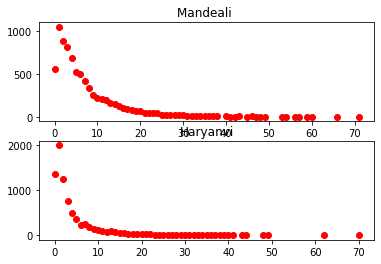

Dogri
Counter({1: 2332, 0: 1609, 2: 1420, 3: 919, 4: 508, 5: 302, 6: 226, 7: 135, 8: 116, 9: 82, 10: 62, 11: 50, 12: 37, 14: 19, 16: 16, 13: 15, 17: 13, 15: 13, 18: 12, 20: 10, 21: 8, 19: 7, 23: 5, 22: 4, 30: 4, 27: 3, 37: 3, 28: 3, 26: 2, 24: 2, 32: 2, 34: 2, 33: 1, 46: 1, 104: 1, 36: 1, 29: 1, 47: 1, 56: 1})
Pahari Mahasui
Counter({1: 1728, 2: 1343, 3: 994, 0: 967, 4: 705, 5: 506, 6: 364, 7: 280, 8: 229, 9: 155, 10: 133, 11: 92, 12: 73, 14: 59, 13: 59, 15: 45, 16: 44, 17: 26, 18: 22, 21: 16, 19: 16, 20: 15, 22: 12, 25: 8, 27: 8, 23: 7, 30: 5, 28: 5, 24: 4, 32: 3, 34: 3, 29: 3, 31: 2, 35: 1, 26: 1, 33: 1, 41: 1, 38: 1, 45: 1})


<Figure size 432x288 with 0 Axes>

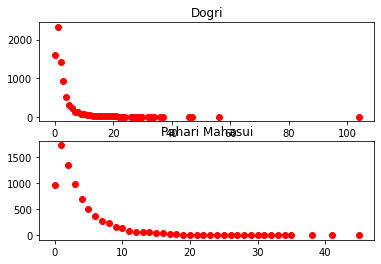

Baghlayani
Counter({1: 1915, 2: 1461, 0: 1112, 3: 1009, 4: 678, 5: 441, 6: 280, 7: 214, 8: 169, 10: 125, 9: 114, 11: 73, 12: 60, 14: 53, 13: 42, 16: 29, 15: 27, 17: 26, 18: 25, 21: 18, 19: 14, 20: 10, 23: 9, 22: 8, 24: 7, 26: 5, 32: 4, 27: 4, 28: 3, 29: 3, 25: 2, 49: 1, 33: 1, 47: 1, 31: 1, 38: 1, 30: 1, 41: 1, 52: 1, 34: 1, 42: 1, 36: 1})
Chambeali
Counter({1: 1053, 2: 922, 3: 751, 4: 598, 0: 573, 5: 573, 6: 491, 7: 394, 8: 332, 9: 281, 10: 247, 11: 218, 12: 181, 13: 170, 14: 138, 15: 119, 17: 100, 16: 99, 18: 99, 19: 74, 20: 60, 21: 44, 26: 40, 22: 39, 23: 32, 24: 29, 29: 24, 25: 20, 27: 19, 28: 19, 30: 16, 33: 13, 32: 13, 31: 11, 38: 9, 41: 9, 36: 9, 37: 7, 35: 6, 40: 6, 34: 5, 42: 3, 43: 3, 46: 3, 39: 3, 45: 3, 44: 2, 47: 2, 53: 2, 54: 2, 59: 1, 50: 1, 78: 1, 94: 1, 49: 1, 87: 1, 67: 1, 58: 1, 48: 1, 64: 1})


<Figure size 432x288 with 0 Axes>

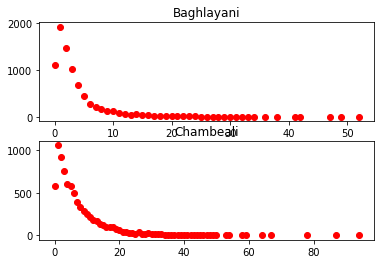

Kulvi Outer Seraji
Counter({1: 1268, 2: 1203, 3: 933, 4: 733, 0: 687, 5: 602, 6: 449, 7: 342, 8: 296, 9: 240, 10: 172, 11: 140, 12: 125, 13: 108, 14: 93, 15: 79, 16: 52, 17: 50, 19: 44, 18: 41, 20: 33, 23: 27, 24: 26, 21: 19, 22: 18, 28: 16, 26: 15, 29: 12, 25: 11, 27: 11, 31: 11, 30: 10, 33: 10, 34: 6, 35: 6, 32: 5, 38: 4, 52: 3, 41: 3, 45: 2, 51: 2, 37: 2, 39: 2, 44: 2, 40: 2, 47: 1, 36: 1, 49: 1, 46: 1, 56: 1, 57: 1})
Gaddi
Counter({1: 1834, 2: 1418, 0: 1047, 3: 894, 4: 624, 5: 520, 6: 323, 8: 212, 7: 210, 9: 176, 10: 120, 11: 93, 12: 78, 13: 73, 14: 51, 15: 41, 16: 34, 17: 30, 19: 23, 18: 22, 20: 20, 21: 19, 24: 13, 23: 12, 25: 11, 22: 11, 29: 7, 26: 6, 32: 6, 27: 5, 30: 4, 28: 4, 33: 2, 37: 2, 42: 2, 39: 1, 49: 1, 36: 1, 44: 1, 31: 1, 56: 1})


<Figure size 432x288 with 0 Axes>

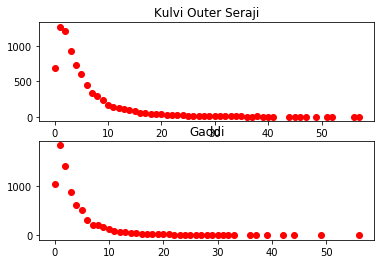

Bhadrawahi
Counter({1: 1388, 2: 1255, 3: 1018, 4: 871, 0: 702, 5: 658, 6: 462, 7: 367, 8: 266, 9: 222, 10: 140, 12: 100, 11: 88, 13: 76, 14: 62, 15: 49, 18: 27, 17: 27, 16: 26, 19: 23, 21: 17, 22: 13, 20: 11, 23: 11, 29: 9, 25: 9, 24: 6, 26: 5, 28: 4, 27: 3, 31: 3, 30: 2, 37: 2, 34: 2, 35: 2, 36: 2, 32: 2, 33: 2, 44: 2, 40: 1, 42: 1})
Bilaspuri
Counter({1: 1575, 2: 1190, 3: 939, 0: 881, 4: 666, 5: 557, 6: 410, 7: 313, 8: 264, 9: 188, 10: 171, 11: 124, 12: 121, 13: 86, 14: 72, 16: 66, 15: 58, 17: 46, 18: 42, 19: 33, 22: 21, 21: 20, 20: 18, 26: 9, 25: 9, 23: 8, 29: 7, 31: 7, 28: 6, 24: 6, 27: 5, 34: 4, 33: 3, 30: 2, 37: 2, 43: 1, 44: 1, 47: 1, 32: 1, 42: 1, 41: 1, 53: 1})


<Figure size 432x288 with 0 Axes>

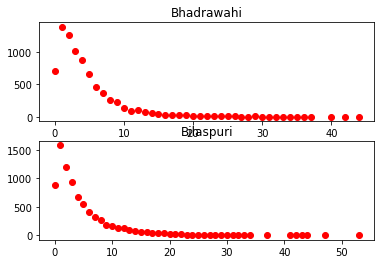

Kulvi
Counter({1: 1668, 2: 1308, 0: 986, 3: 928, 4: 701, 5: 487, 6: 419, 7: 281, 8: 192, 9: 181, 10: 135, 11: 107, 12: 90, 13: 69, 14: 56, 15: 47, 17: 40, 16: 40, 18: 36, 20: 24, 19: 18, 21: 17, 22: 11, 25: 10, 24: 10, 26: 8, 23: 7, 28: 7, 30: 7, 27: 6, 29: 4, 31: 3, 39: 3, 36: 3, 34: 3, 46: 3, 42: 2, 37: 1, 40: 1, 41: 1, 73: 1, 33: 1, 32: 1, 35: 1, 62: 1, 38: 1})
Kangri
Counter({1: 1677, 2: 1288, 0: 996, 3: 866, 4: 633, 5: 512, 6: 386, 7: 290, 8: 227, 9: 192, 10: 142, 11: 122, 12: 102, 13: 82, 14: 63, 15: 51, 16: 47, 17: 43, 18: 42, 21: 26, 20: 20, 24: 18, 19: 16, 22: 13, 23: 11, 26: 10, 27: 10, 30: 6, 25: 6, 28: 6, 29: 6, 34: 5, 32: 3, 31: 3, 35: 2, 36: 1, 47: 1, 43: 1, 39: 1, 40: 1, 54: 1, 37: 1, 45: 1, 33: 1, 46: 1, 38: 1})


<Figure size 432x288 with 0 Axes>

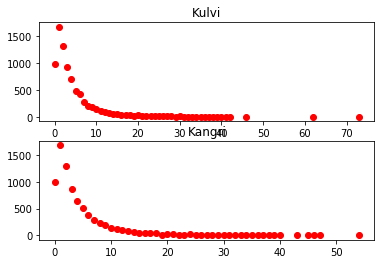

<Figure size 432x288 with 0 Axes>

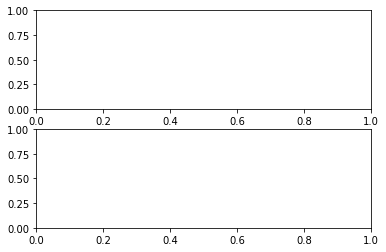

In [17]:
print("\n..................... Post checking the alignments ......................\n")
cwd = os.getcwd()
corpora_path = '/'.join(cwd.split('/')[:-2]) + '/corpora/'
clean_data()
print("\n......... Processing corpora ..........\n")
words_diff_dic = defaultdict(list)
for book in sorted(os.listdir(corpora_path)):
    print("\n************************ Book : ",book, '****************************\n')
    for min_lang in os.listdir(corpora_path + book):
        print("\n\nmin_lang :: ",min_lang)
        lang_name = min_lang.split('_')[0]
        source_file = book + '_hindi.txt'
        target_file = book + '_' + lang_name + '.txt'
        source_lines = open(corpora_path + book + '/' + min_lang + '/' + source_file, 'r').readlines()
        target_lines = open(corpora_path + book + '/' + min_lang + '/' + target_file, 'r').readlines()
        target_file_cleaned = book + '_' + lang_name + '_cleaned.txt'
        source_file_cleaned = book + '_hindi_cleaned.txt'
        source_lines_cleaned = open(corpora_path + book + '/' + min_lang + '/' + source_file_cleaned, 'r').readlines()
        target_lines_cleaned = open(corpora_path + book + '/' + min_lang + '/' + target_file_cleaned, 'r').readlines()
        post_file = book + '_' + lang_name + '_checked.txt'
        if len(source_lines) != len(target_lines):
            # print("Mismatch in number of lines.........")
            break
        data = ''
        temp = []    
        for index,s_line in enumerate(source_lines_cleaned):
            s_line = s_line.split('\t')[-1]
            t_line = (target_lines_cleaned[index]).split('\t')[-1]
            words_diff  = abs(len(s_line.split()) - len(t_line.split()))
            temp.append(words_diff)
            if words_diff > 15:
                # print("----------------------------------------------------------------------------------------")
                edit_ratio = round(Levenshtein.ratio(s_line,t_line), 2)
                cosine_score = round(find_cosine_similarity(s_line,t_line), 2)
                # print("....", source_lines[index])
                # print(">>>>", target_lines[index])
                if cosine_score < 0.1 and edit_ratio < 0.3:
#                     print(words_diff, '\t',edit_ratio, '\t', cosine_score, '\t', source_lines[index].strip(), '\t', target_lines[index].strip(), '\t','WRONG ALIGNMENT\n')
                    data += (target_lines[index]).strip() + '\t' + 'WRONG ALIGNMENT' + '\n'
                else:
#                     print(words_diff, '\t',edit_ratio, '\t', cosine_score, '\t', source_lines[index].strip(), '\t', target_lines[index].strip(), '\t', 'CORRECT ALIGNMENT\n')
                    data += target_lines[index]     
            else:
                data += target_lines[index]        
        fp = open(corpora_path + book + '/' + min_lang + '/' + post_file, 'w')    
        fp.write(data)
        fp.close()
        if lang_name not in words_diff_dic:
            words_diff_dic[lang_name] = temp
        else:
            words_diff_dic[lang_name] += temp                    
analyze_words_diff(words_diff_dic)    

## Analyzis

 - After processing cleaned data the count of wrong alignments  increased. Found that if segments within paranthesis is there in source, its there in target as well without paranthesis. So its not good to clean them
 - Tried to clean punctuations alone, and count of wrong alignments decreased. So now cleaning punctuations only in data pre-processing.
 - Currently setting threshold value for words_count_diff common for all languages. But by analyzing the graph found that it varies with languages. 
 - Need to find threshold value for each language.

# Experiment 3

 - Filter verses that meets throshold value of count_diff (if threshold is 10 get verses having this difference <10)
 - Train word aligner using this collection of verses using Berkeley aligner
 - Get translation table from the aligner and apply that in the other set(verses having diff >10) and found the values to check the quality